# Relatório Final - ATP de Preparação e Análise Exploratória de Dados
# Curso de Tecnologia em Big Data e Inteligência Analítica
# Pontifícia Universidade Católica do Paraná (PUCPR)

`Jesus Wildes Suathê Farias` - `farias.jesus@pucpr.edu.br`

# Introdução

Nesta atividade, vamos trabalhar com um conjunto de dados da empresa Enron. A Enron foi uma das maiores empresas de energia dos Estados Unidos. No seu auge, chegou a valer 65 bilhões de dólares e ela faliu em 24 dias.  A Enron foi fundada em 1985 por Kenneth Lay com a fusão da Houston Natural Gas e da InterNorth. Anos depois, quando Jeffrey Skilling tomou posse, ele estabeleceu um conjunto de diretores que criaram entidades fictícias, relatórios financeiros fracos e contabilidades erradas, que somadas, esconderam bilhões de dólares e projetos fracassados dos investidores. O esquema foi tão complexo que nem mesmo auditorias profissionais foram capazes de identificar estes problemas, e a empresa foi investigada pelo governo norte-americano, incluindo a sua suprema corte. 
A base de dados utilizada na investigação incluía  aproximadamente 500 mil e-mails trocados por empregados da Enron.  Estes e-mails foram obtidos pela comissão regulatória de energia dos Estados Unidos durante sua investigação. A base de dados que vamos utilizar sumariza informações não apenas destes e-mails, mas também de salário e ações da bolsa de valores dos envolvidos. Além disso, os funcionários são divididos em pessoas de interesse (Person of Interest, ou POI), que participaram da fraude; e funcionários que não participaram da fraude, ou não-POIs.

## Dicas

Nesta análise e preparação de dados, nós precisamos ir além de explorações simples. Garanta que toda exploração e análise de dados seja acompanhada de uma análise crítica.

# Importando as bibliotecas

Na célula abaixo, as principais bibliotecas para análise de dados são importadas. Sinta-se a vontade para importar mais bibliotecas de acordo com sua demanda e/ou preferência, contudo, garanta que todos os comandos de `import` sejam feitos na célula abaixo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# carregue os módulos de sua preferência aqui
# Adicionado para exibir Markdown no Jupyter Notebook
from IPython.display import Markdown, display

# Adicionado biblioteca para formatar os valores numéricos das visualizações
import matplotlib.ticker as ticker

# Configurando um tema para o Seaborn
sns.set_theme(palette='colorblind')

# Carregamento de dados

Na célula abaixo é realizado o carregamento da base de dados.
Você **não** deve alterar o código apresentado.

In [2]:
df = pd.read_csv('enron.csv')

Verificando se os dados carregaram corretamente:

In [3]:
df.head(5)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name
0,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0,ALLEN PHILLIP K
1,NaN,178980.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0,BADUM JAMES P
2,NaN,NaN,-5104.0,NaN,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,...,864523.0,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0,BANNANTINE JAMES M
3,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0,BAXTER JOHN C
4,400000.0,260455.0,-201641.0,NaN,frank.bay@enron.com,NaN,129142.0,NaN,NaN,NaN,...,69.0,False,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0,BAY FRANKLIN R


# Análise descritiva de dados

Nesta etapa, você conduzirá uma análise descritiva da base de dados da Enron.

Para a base de dados como um todo, você deve reportar:
- O número de indivíduos (instâncias) na tabela;
- O número de variáveis descritivas (colunas ou atributos) destes indivíduos;
- O número de pessoas de interesse, isto é, fraudadores (POIs) e não-POIs;

Para cada uma das variáveis numéricas, você deve apresentar:
- Média
- Mediana
- Variância
- Desvio padrão
- Quartis

E para cada uma das variáveis categóricas:
- A moda
- Os valores únicos de cada variável

Além de apresentar estatísticas sobre cada variável da base de dados, a análise a ser conduzida nesta etapa requer uma análise crítica. 
Desta forma, você é convidado a extrair *insights* a partir destas estatísticas, verificando se os valores apresentados condizem ou não com a realidade.
**Lembre-se: todas estas estatísticas devem ser calculadas e apresentadas, de forma legível, no relatório fornecido na descrição da ATP.**


In [4]:
# Excluíndo a linha de TOTAIS, contida no final do arquivo, que criava altas variações.
df = df[df['name'] != 'TOTAL']

In [5]:
# Calculando e exibindo a quantidade de indivíduos (instâncias) no dataset, utilizando Markdown para formatação
display(Markdown('Quantidade de indivíduos (instâncias) no dataset: **{}**'.format(len(df))))

Quantidade de indivíduos (instâncias) no dataset: **145**

In [6]:
# Calculando e exibindo a quantidade de variáveis descritivas no dataset
variaveis_descritivas = df.select_dtypes(include=['object', 'category'])

# Exibindo a quantidade de variáveis descritivas (através de len() ) e seus nomes
display(Markdown(f'**Variáveis descritivas do dataset**: {variaveis_descritivas.shape[1]} variáveis.'))
display(Markdown(f'**Variáveis descritivas:**: {variaveis_descritivas.columns.tolist()}'))

**Variáveis descritivas do dataset**: 2 variáveis.

**Variáveis descritivas:**: ['email_address', 'name']

In [7]:
# Calculando e exibindo a quantidade de pessoas de interesse (POI) no dataset
display(Markdown('**Quantidade de Pessoas de Interesse**: {}'.format(df['poi'].sum())))
display(Markdown('**Quantidade de Pessoas fora de interesse**: {}'.format((~df['poi']).sum())))

**Quantidade de Pessoas de Interesse**: 18

**Quantidade de Pessoas fora de interesse**: 127

In [8]:
# Calculando, criando um novo DataFrame e exibindo a quantidade de variáveis numéricas no dataset original
# Criando uma variável que contém somente as colunas numéricas do DataFrame
variaveis_numericas = df.select_dtypes(include=['number']).columns
resumo = pd.DataFrame({
    'Média': df[variaveis_numericas].mean(numeric_only=True),
    'Mediana': df[variaveis_numericas].median(numeric_only=True),
    'Variância': df[variaveis_numericas].var(numeric_only=True),
    'Desvio Padrão': df[variaveis_numericas].std(numeric_only=True),
    '1º Quartil (25%)': df[variaveis_numericas].quantile(0.25, numeric_only=True),
    '3º Quartil (75%)': df[variaveis_numericas].quantile(0.75, numeric_only=True)
}).T

display(Markdown('**Cálculos estatísticos das variáveis numéricas**'))
display(Markdown(resumo.to_markdown(floatfmt=".2f")))

**Cálculos estatísticos das variáveis numéricas**

|                  |            bonus |   deferral_payments |   deferred_income |   director_fees |   exercised_stock_options |      expenses |   from_messages |   from_poi_to_this_person |   from_this_person_to_poi |       loan_advances |   long_term_incentive |            other |   restricted_stock |   restricted_stock_deferred |         salary |   shared_receipt_with_poi |   to_messages |    total_payments |   total_stock_value |
|:-----------------|-----------------:|--------------------:|------------------:|----------------:|--------------------------:|--------------:|----------------:|--------------------------:|--------------------------:|--------------------:|----------------------:|-----------------:|-------------------:|----------------------------:|---------------:|--------------------------:|--------------:|------------------:|--------------------:|
| Média            |       1201773.07 |           841602.53 |        -581049.81 |        89822.88 |                2959559.26 |      54192.01 |          608.79 |                     64.90 |                     41.23 |         27975000.00 |             746491.20 |        465276.66 |         1147424.09 |                   621892.82 |      284087.54 |                   1176.47 |       2073.86 |        2623421.18 |          3352073.02 |
| Mediana          |        750000.00 |           221063.50 |        -151927.00 |       106164.50 |                1297049.00 |      46547.50 |           41.00 |                     35.00 |                      8.00 |          2000000.00 |             422158.00 |         51984.50 |          441096.00 |                  -140264.00 |      258741.00 |                    740.50 |       1211.00 |        1100246.50 |          1095040.00 |
| Variância        | 2078439602903.44 |    1662352834379.93 |   887507949036.67 |   1690254161.72 |         30243945891878.36 | 2125982471.43 |      3389406.00 |                   7565.39 |                  10014.63 | 2151341875000000.00 |       744626476445.91 | 1931319079209.87 |   5061466658800.40 |           14788088286877.41 | 31375432034.87 |                1388432.46 |    6670344.36 | 90024146625871.03 |   42678561561688.52 |
| Desvio Padrão    |       1441679.44 |          1289322.63 |         942076.40 |        41112.70 |                5499449.60 |      46108.38 |         1841.03 |                     86.98 |                    100.07 |         46382560.03 |             862917.42 |       1389719.06 |         2249770.36 |                  3845528.35 |      177131.12 |                   1178.32 |       2582.70 |        9488105.53 |          6532883.10 |
| 1º Quartil (25%) |        425000.00 |            79644.50 |        -611209.25 |        83674.50 |                 506765.00 |      22479.00 |           22.75 |                     10.00 |                      1.00 |          1200000.00 |             275000.00 |          1209.00 |          252055.00 |                  -329825.00 |      211802.00 |                    249.75 |        541.25 |         386380.25 |           494136.00 |
| 3º Quartil (75%) |       1200000.00 |           867211.25 |         -37926.00 |       112815.00 |                2542813.00 |      78408.50 |          145.50 |                     72.25 |                     24.75 |         41762500.00 |             831809.00 |        357577.25 |          985032.00 |                   -72419.00 |      308606.50 |                   1888.25 |       2634.75 |        2084662.75 |          2606763.00 |

In [9]:
# Calculando e exibindo a moda das variáveis descritivas do dataset
moda = variaveis_descritivas.mode()

# Como são variáveis do tipo texto, a moda é apenas uma repetição de todos os valores das variáveis
moda

,email_address,name
0,a..martin@enron.com,ALLEN PHILLIP K
1,adam.umanoff@enron.com,BADUM JAMES P
2,andrew.fastow@enron.com,BANNANTINE JAMES M
3,ben.glisan@enron.com,BAXTER JOHN C
4,bill.cordes@enron.com,BAY FRANKLIN R
...,...,...
140,NaN,WINOKUR JR. HERBERT S
141,NaN,WODRASKA JOHN
142,NaN,WROBEL BRUCE
143,NaN,YEAGER F SCOTT


In [10]:
# Exibindo os valores únicos de cada variável descritiva do dataset
# Mas como são nomes, todos os valores são exibidos.
for coluna in variaveis_descritivas.columns:
    print(f'\nValores únicos da variável {coluna}:')
    print(variaveis_descritivas[coluna].unique())


Valores únicos da variável email_address:
['phillip.allen@enron.com' nan 'james.bannantine@enron.com'
 'frank.bay@enron.com' 'sally.beck@enron.com' 'tim.belden@enron.com'
 'david.berberian@enron.com' 'rick.bergsieker@enron.com'
 'sanjay.bhatnagar@enron.com' 'philippe.bibi@enron.com'
 'jeremy.blachman@enron.com' 'raymond.bowen@enron.com'
 'michael.brown@enron.com' 'john.buchanan@enron.com' 'bob.butts@enron.com'
 'rick.buy@enron.com' 'christopher.calger@enron.com'
 'rebecca.carter@enron.com' 'richard.causey@enron.com'
 'diomedes.christodoulou@enron.com' 'wes.colwell@enron.com'
 'bill.cordes@enron.com' 'chip.cox@enron.com' 'joseph.deffner@enron.com'
 'david.delainey@enron.com' 'james.derrick@enron.com'
 'timothy.detmering@enron.com' 'janet.dietrich@enron.com'
 'richard.dimichele@enron.com' 'keith.dodson@enron.com'
 'jeff.donahue@enron.com' 'w.duran@enron.com' 'john.echols@enron.com'
 'steven.elliott@enron.com' 'jim.fallon@enron.com'
 'andrew.fastow@enron.com' 'jay.fitzgerald@enron.com'
 

In [11]:
for coluna in variaveis_descritivas.columns:
    globals()[f'df_{coluna}'] = variaveis_descritivas[[coluna]].dropna().drop_duplicates()

print(len(variaveis_descritivas))

145


In [12]:
display(Markdown('Valores únicos da variável categórica **email_address**'))
df_email_address.head()

Valores únicos da variável categórica **email_address**

,email_address
0,phillip.allen@enron.com
2,james.bannantine@enron.com
4,frank.bay@enron.com
6,sally.beck@enron.com
7,tim.belden@enron.com


In [13]:
display(Markdown('Valores únicos da variável categórica **name**'))
df_name.head()

Valores únicos da variável categórica **name**

,name
0,ALLEN PHILLIP K
1,BADUM JAMES P
2,BANNANTINE JAMES M
3,BAXTER JOHN C
4,BAY FRANKLIN R


## Insights da Análise Descritiva dos Dados

Tendo em vista essa análise inicial dos dados, fico chocado com o tamanho da variância e desvio padrão entre todos as variáveis numéricas, quando calculados os valores estatísticos dessas variáveis. O que significa uma disparidade muito grande de valores entre todos os dados quantitativos deste dataset.

# Análise univariada de dados

Nesta seção, você conduzirá uma análise univariada de dados.
Esta análise deve contemplar **todas** as variáveis disponíveis na base de dados, exceto o **nome do indivíduo**.
O objetivo desta etapa é identificar o comportamento das variáveis, verificando curtose e assimetria, assim como extraindo insights sobre cada variável individualmente.
Desta forma, para cada variável, trabalhe com as seguintes etapas:

* Crie um cabeçalho no relatório com o nome da variável;
* Crie visualizações univariadas (histogramas, box-plots, etc), de acordo com o tipo de dado; e
* Apresente as principais conclusões que podemos obter a partir destas visualizações.



In [14]:
# Criação de funções que serão reutilizadas
def adicionar_legenda_escala(texto="K = 1,000   |   M = 1,000,000", 
                              x=0.95, y=0.01, 
                              fontsize=10, color='black', ha='right'):
    """
    Adiciona uma legenda explicativa de escala numérica no canto da figura.
    
    Parâmetros:
    - texto: string a ser exibida
    - x, y: posição relativa na figura (0 a 1)
    - fontsize: tamanho da fonte
    - color: cor do texto
    - ha: alinhamento horizontal ('left', 'center', 'right')
    """
    plt.text(
        x, y, texto,
        fontsize=fontsize,
        color=color,
        ha=ha,
        transform=plt.gcf().transFigure
    )

def formatar_valores(x, _):
    if x < 0:
        return f'-{abs(x)/1e6:.0f}M' if abs(x) >= 1e6 else \
               f'-{abs(x)/1e3:.0f}K' if abs(x) >= 1e3 else \
               f'{int(x):,}'
    else:
        return f'{x/1e6:.0f}M' if x >= 1e6 else \
               f'{x/1e3:.0f}K' if x >= 1e3 else \
               f'{int(x):,}'
    
formatter = ticker.FuncFormatter(formatar_valores)

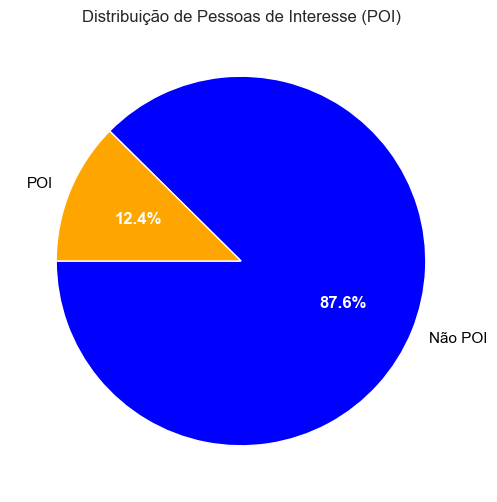

In [15]:
contagem_poi = df['poi'].value_counts()

rótulos = ['Não POI', 'POI']

fig, ax = plt.subplots(figsize=(10, 6))
wedged, texts, autotexts = ax.pie(contagem_poi, labels=rótulos, autopct='%1.1f%%', startangle=900, colors=['blue', 'orange'])

for text in texts:
    text.set_color('black')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Distribuição de Pessoas de Interesse (POI)')
plt.show()

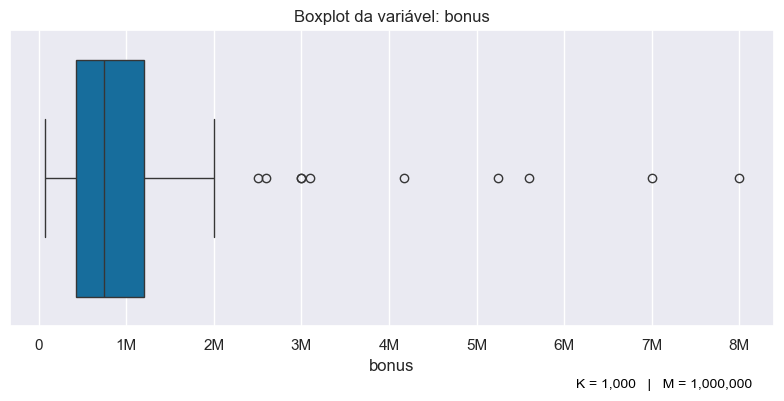

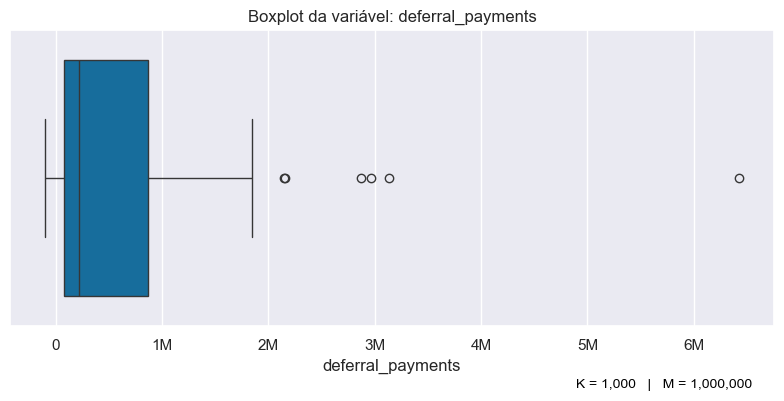

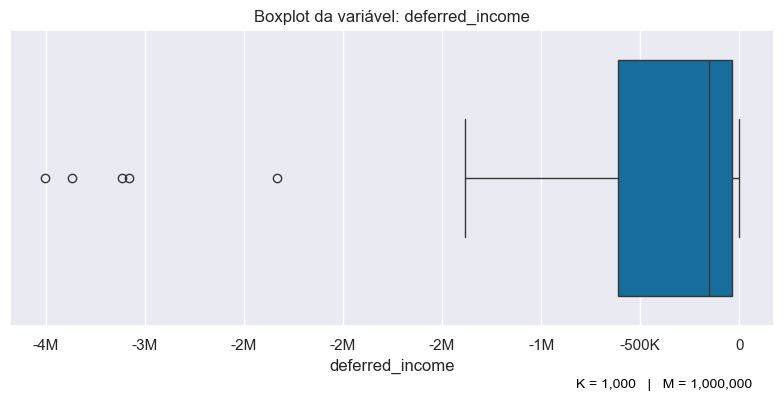

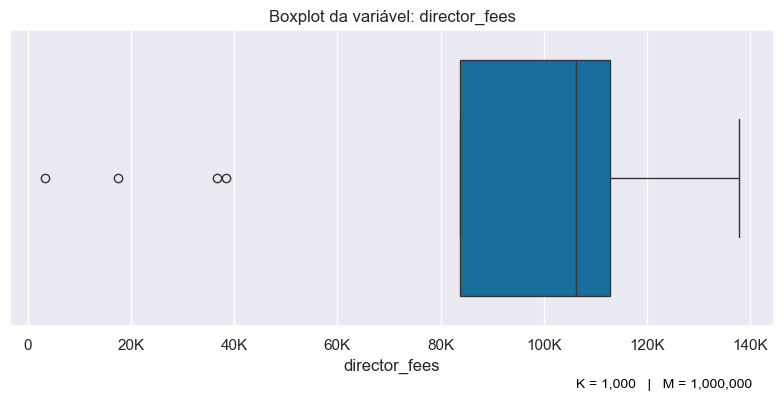

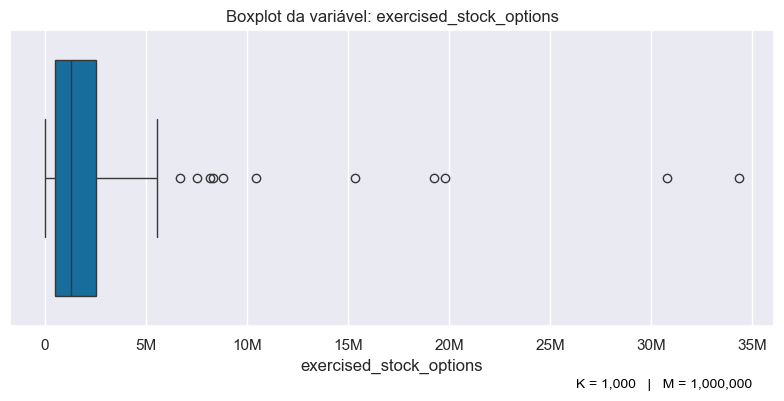

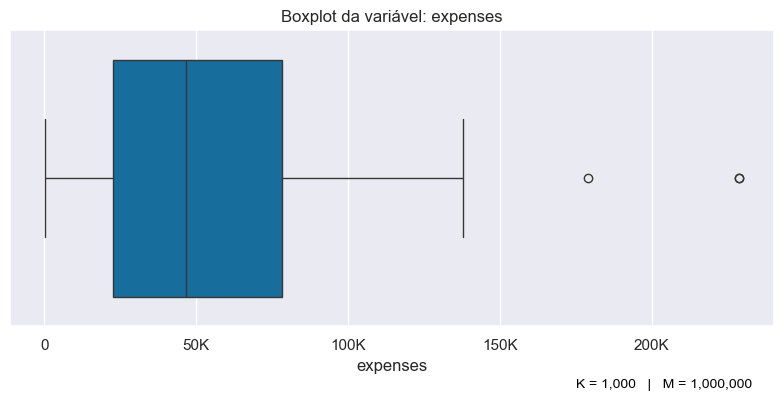

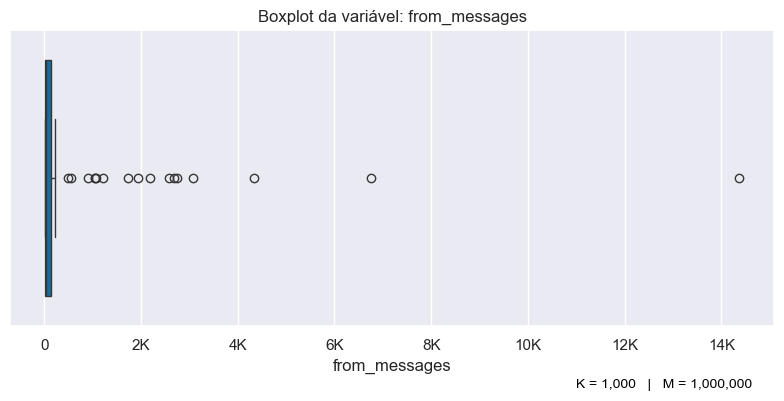

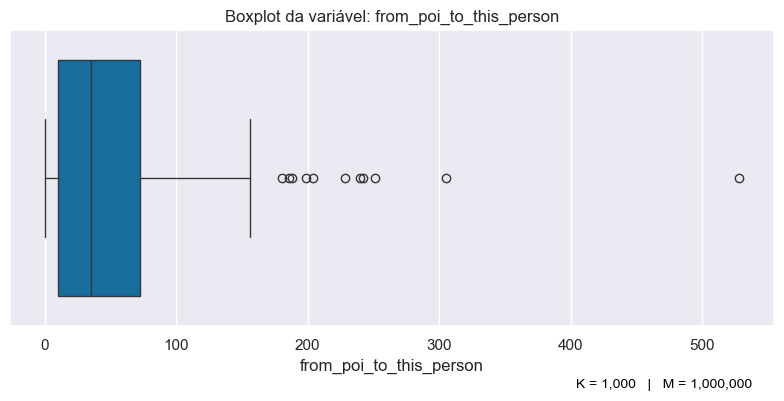

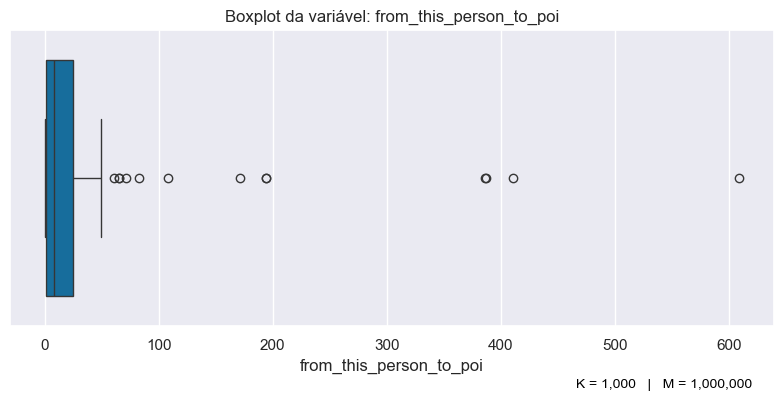

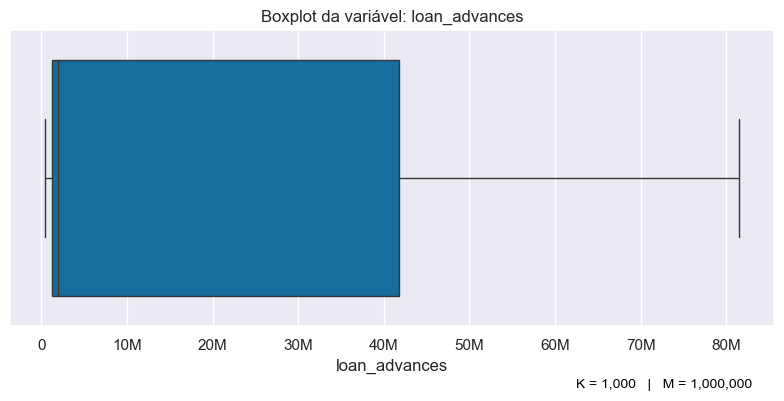

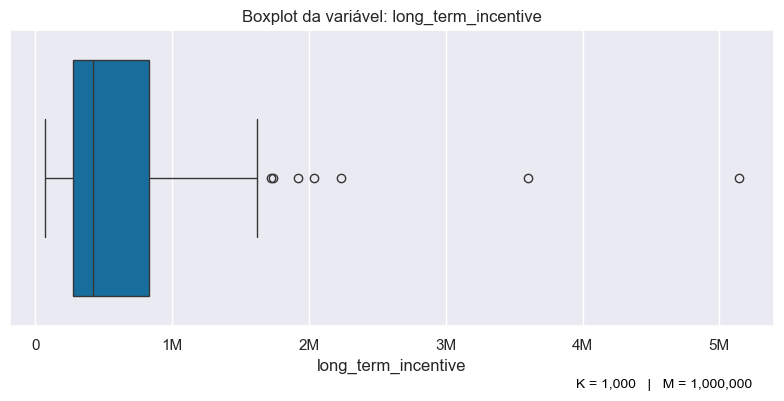

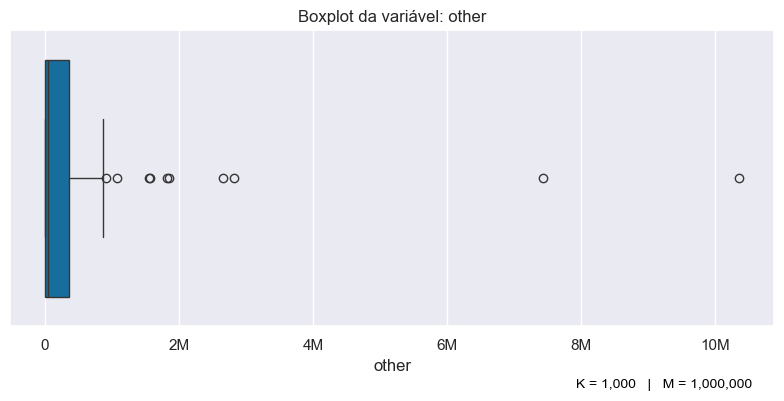

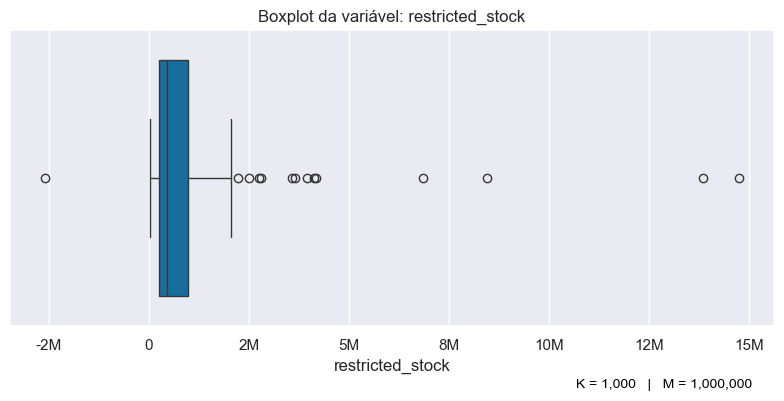

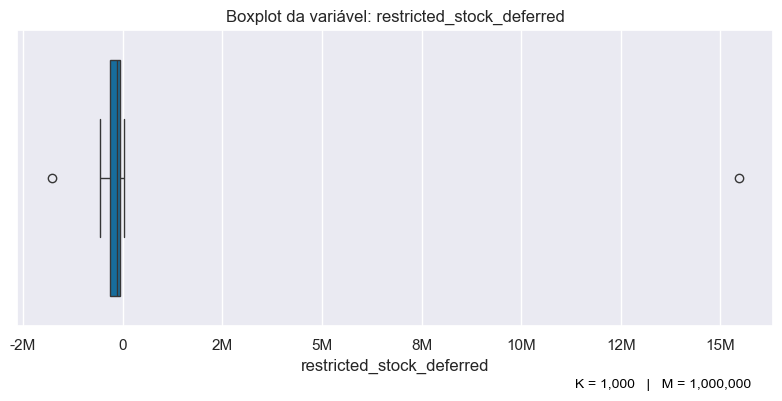

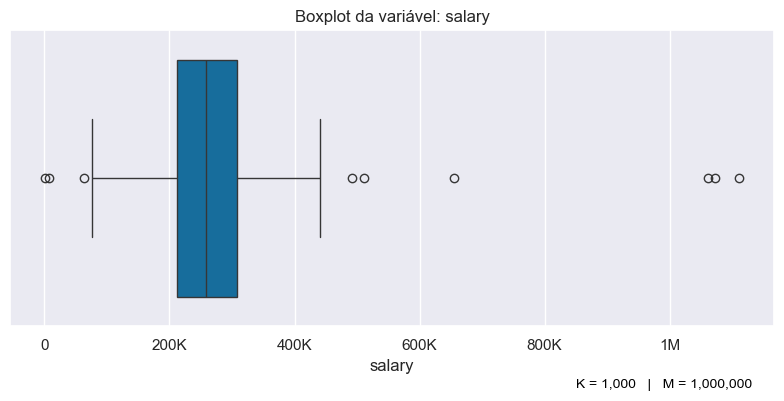

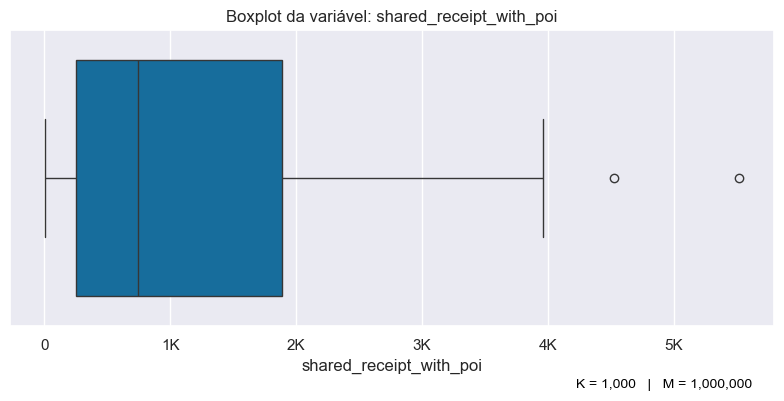

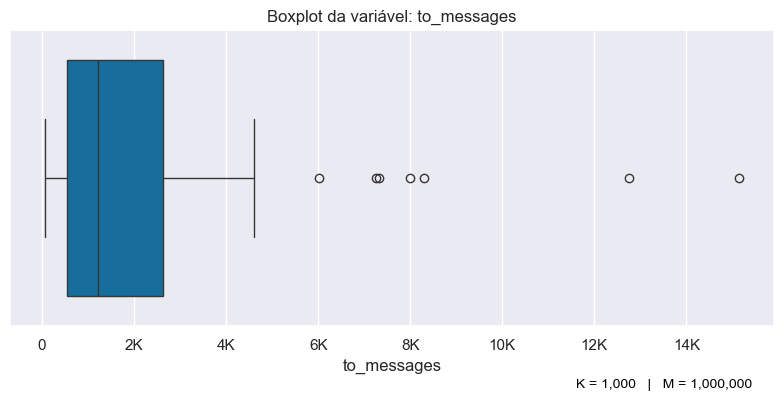

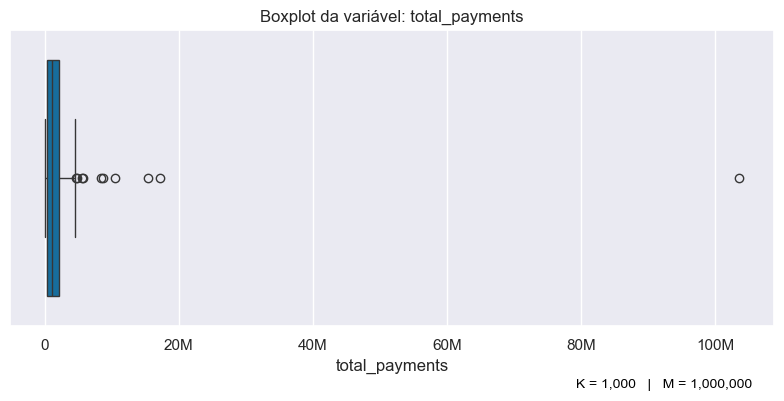

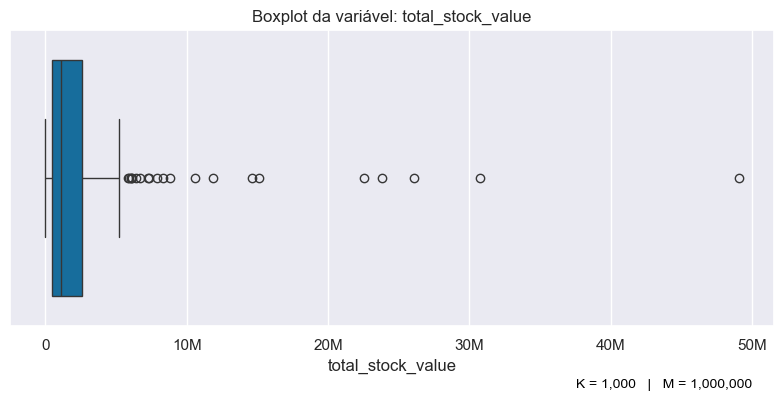

In [21]:
# Importando o módulo de formatação de números do matplotlib para exibir os valores em milhões


# Plotando histogramas para as variáveis numéricas
for var in variaveis_numericas:
    plt.figure(figsize=(8, 4))
    ax = sns.boxplot(x=df[var])
    
    # Formata o eixo X para mostrar valores em milhões com 'M'
    ax.xaxis.set_major_formatter(formatter)
    plt.title(f'Boxplot da variável: {var}')
    plt.xlabel(var)
    plt.tight_layout()
    adicionar_legenda_escala()
    plt.show()

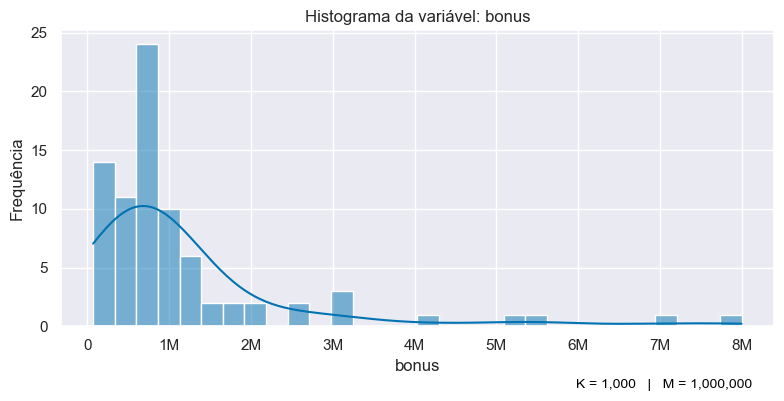

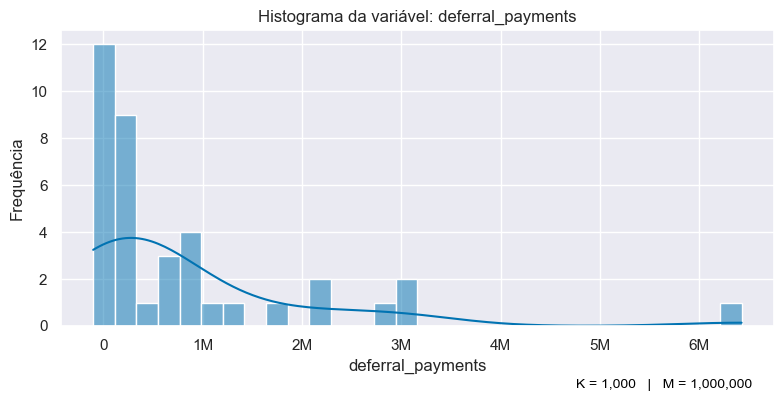

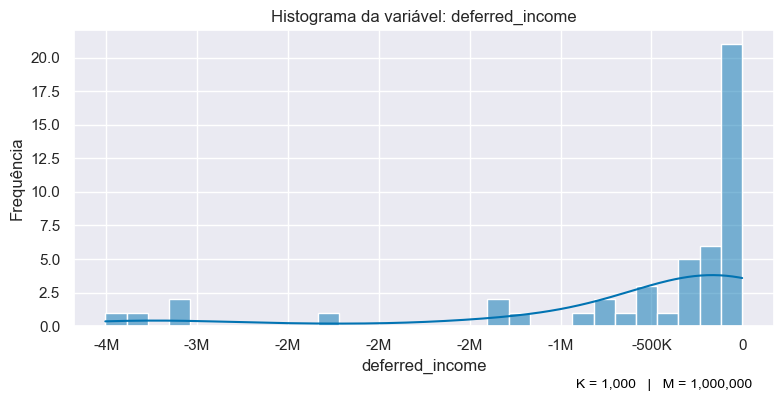

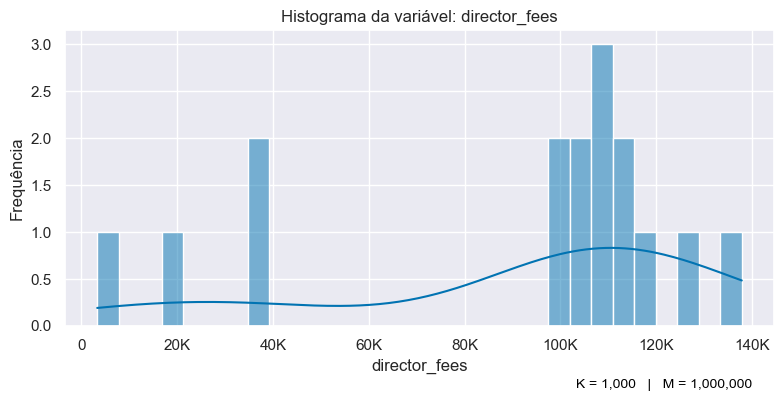

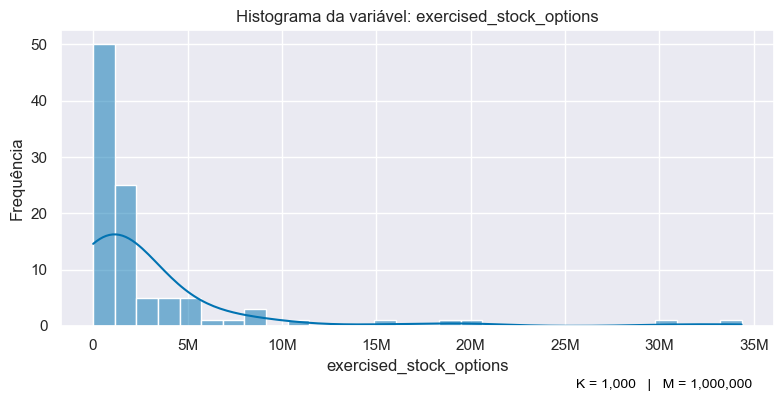

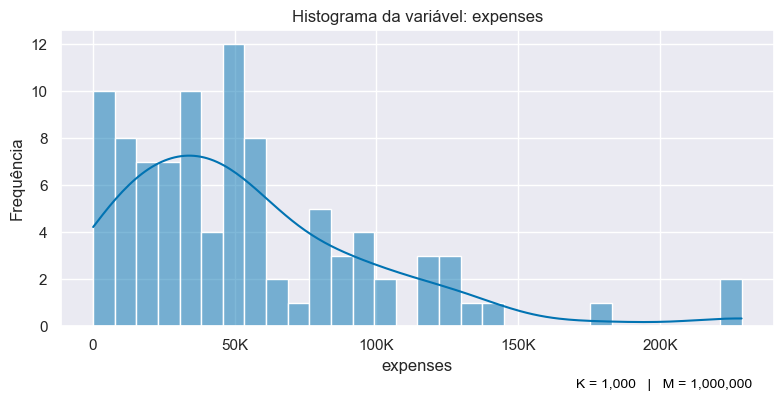

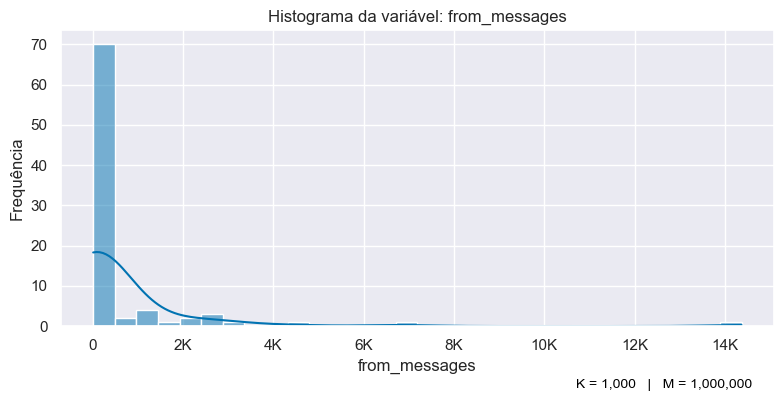

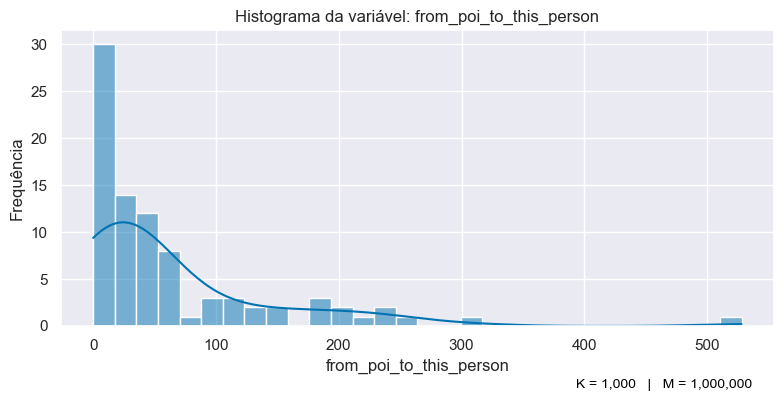

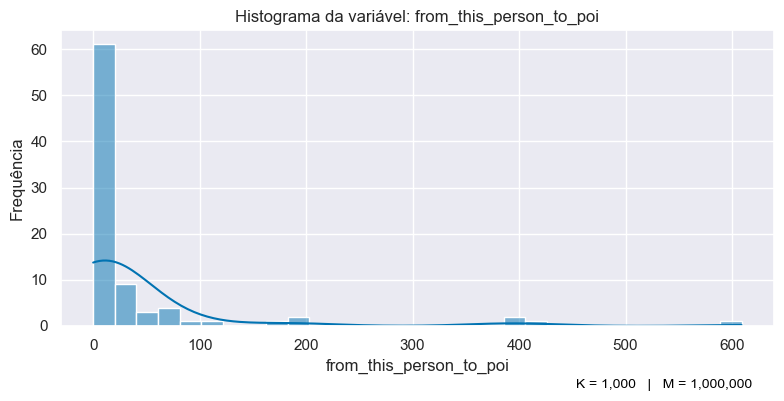

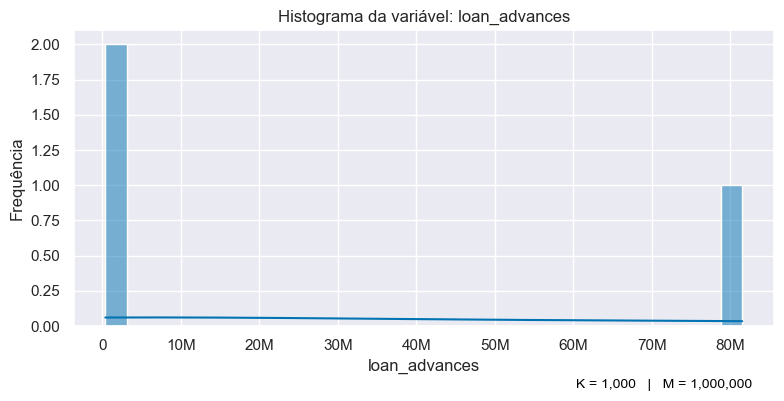

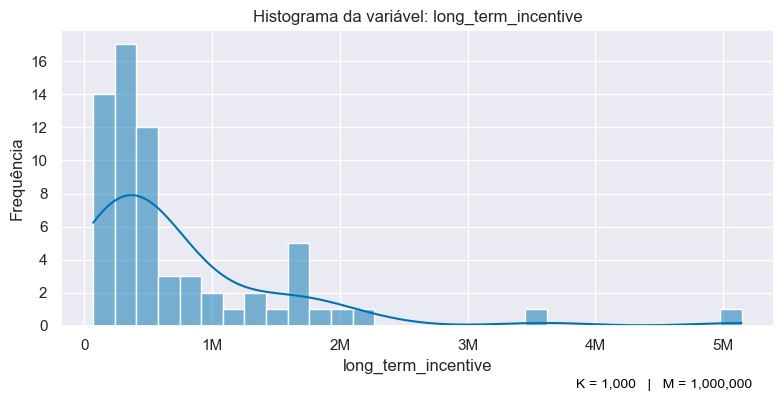

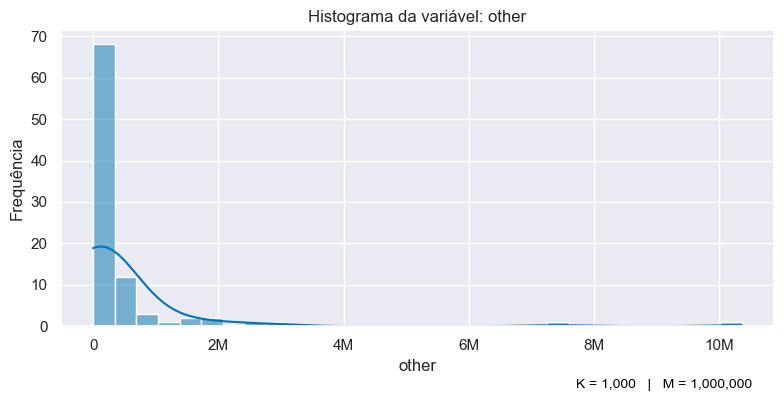

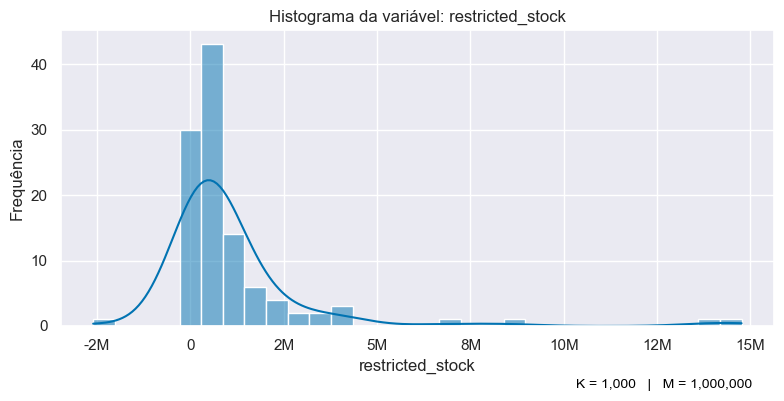

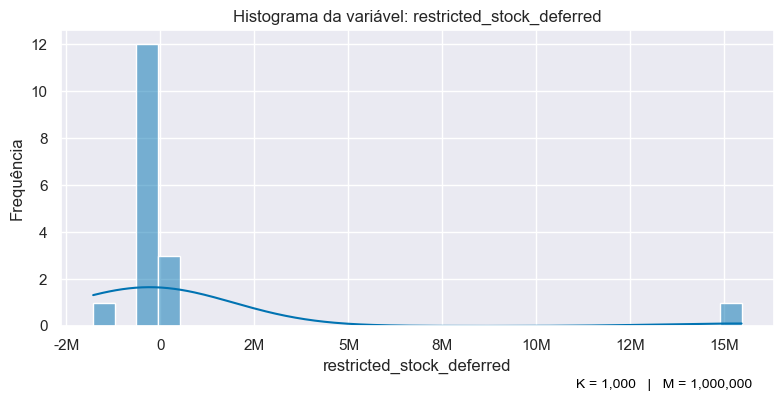

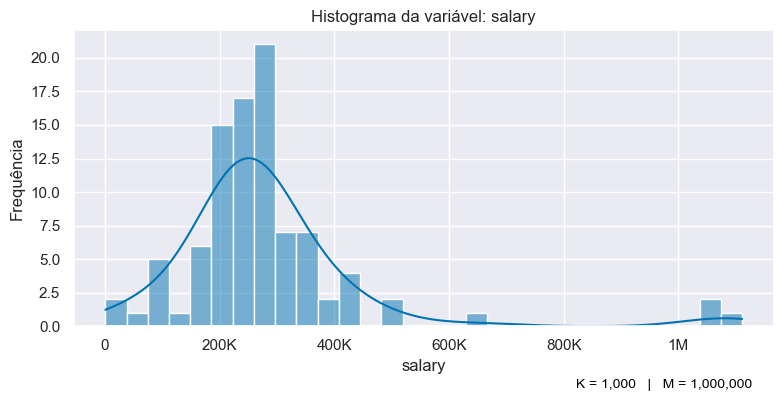

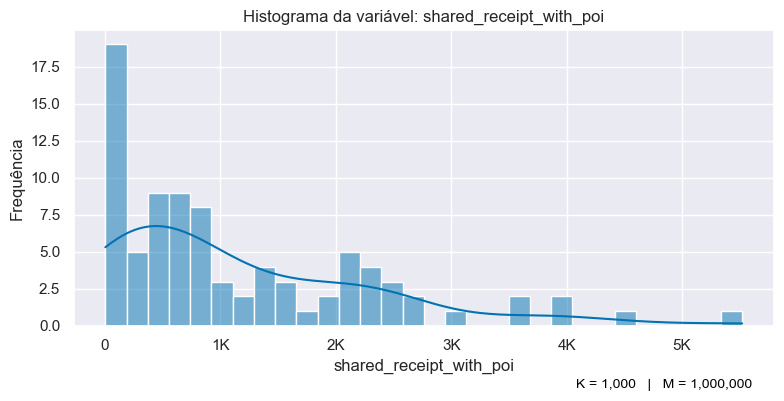

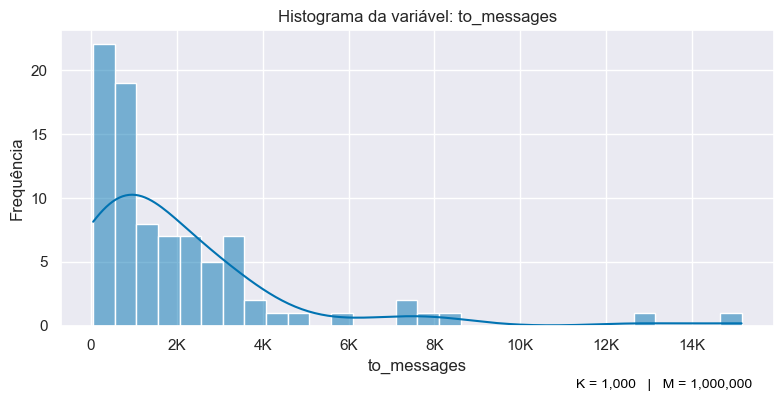

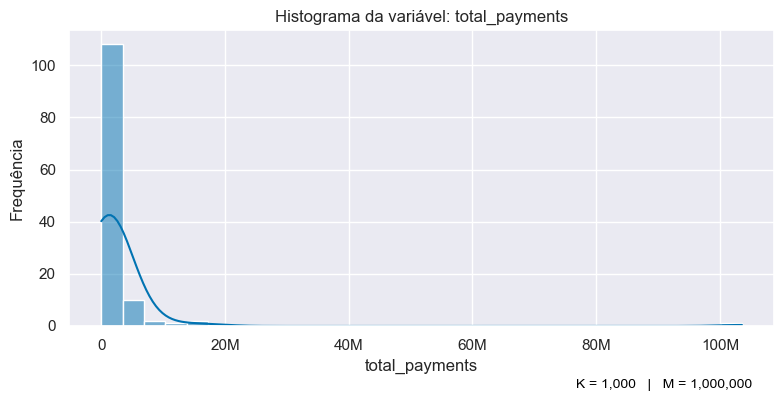

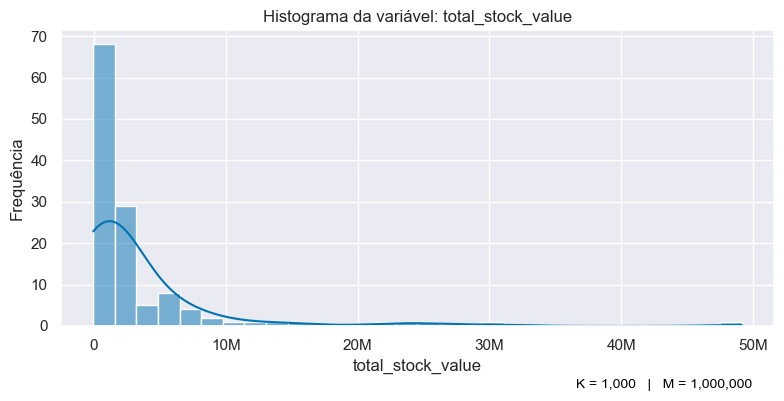

In [20]:
# Construção de histogramas para as variáveis numéricas, utilizando de estrutura de repetição
for var in variaveis_numericas:
    plt.figure(figsize=(8, 4))
    ax = sns.histplot(x=df[var], bins=30, kde=True)

    # Formata o eixo X para mostrar valores em milhões com 'M', para melhor visualização
    ax.xaxis.set_major_formatter(formatter)
    plt.title(f'Histograma da variável: {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.tight_layout()
    adicionar_legenda_escala()
    plt.show()

## Conclusões da Análise univariada de dados

Verificando ambas as versões dos gráficos em histograma e box-plot, constata-se uma disparidade muito grande entre os valores, bem como o fator quase que único das discrepâncias, pois observamos alguns outliers de valor extremamente discrepante, confirmados pelos histogramas de baixa frequência, mas de valor exorbitante. Claramente um reflexo danoso das práticas financeiras da empresa.

Não foi criado uma visualização para os dados da variável email_adress, pois, conforme visto na etapa 1, são todos únicos e possuem todos os domínios @enron.com.

# Análise multivariada de dados

Nesta seção, você deverá conduzir uma análise de dados multivariada. O objetivo desta etapa é encontrar relações e/ou correlações entre as variáveis da base de dados da Enron.
Apesar de mais flexível que a etapa anterior, esta é uma das etapas mais importantes da ATP, uma vez que esta base de dados possui inúmeros relacionamentos interessantes a serem descobertos e reportados.
Nesta etapa, você deverá criar visualizações, contudo, sempre no seguinte formato:
- Apresentar uma pergunta/hipótese sobre os dados,
- Criar uma visualização que responda esta pergunta ou confirme a hipótese, e
- Análise dos dados a partir desta visualização, respondendo textualmente a pergunta/hipótese afirmada anteriormente, assim como apresentando ao leitor os principais insights obtidos a partir da visualização.

Esta etapa do projeto requer que ao menos 20 visualizações bivariadas sejam criadas. Sinta-se a vontade para utilizar gráficos de barra, box-plots, violin plots, ou demais gráficos discutidos durante o curso. Note, contudo, que a utilização dos gráficos deverá ser apropriada, isto é, o tipo de cada gráfico deve ser aderente com os tipos de dados sendo apresentados.

In [22]:
# Segregação de total_payments em faixas
df['faixa_de_pagamento'] = pd.cut(df['total_payments'], bins=[0, 1e6, 5e6, 1e7,np.inf], labels=['<1M', '1-5M', '5-10M', '>10M'])

# Variável para ser utilizada nas palettas que envolvam POI
# Adicionado o dict str: str devido ao scatterplor tratar eixos como string
cores_poi = {True: 'green', False: 'red', 'True': 'green', 'False': 'red'}

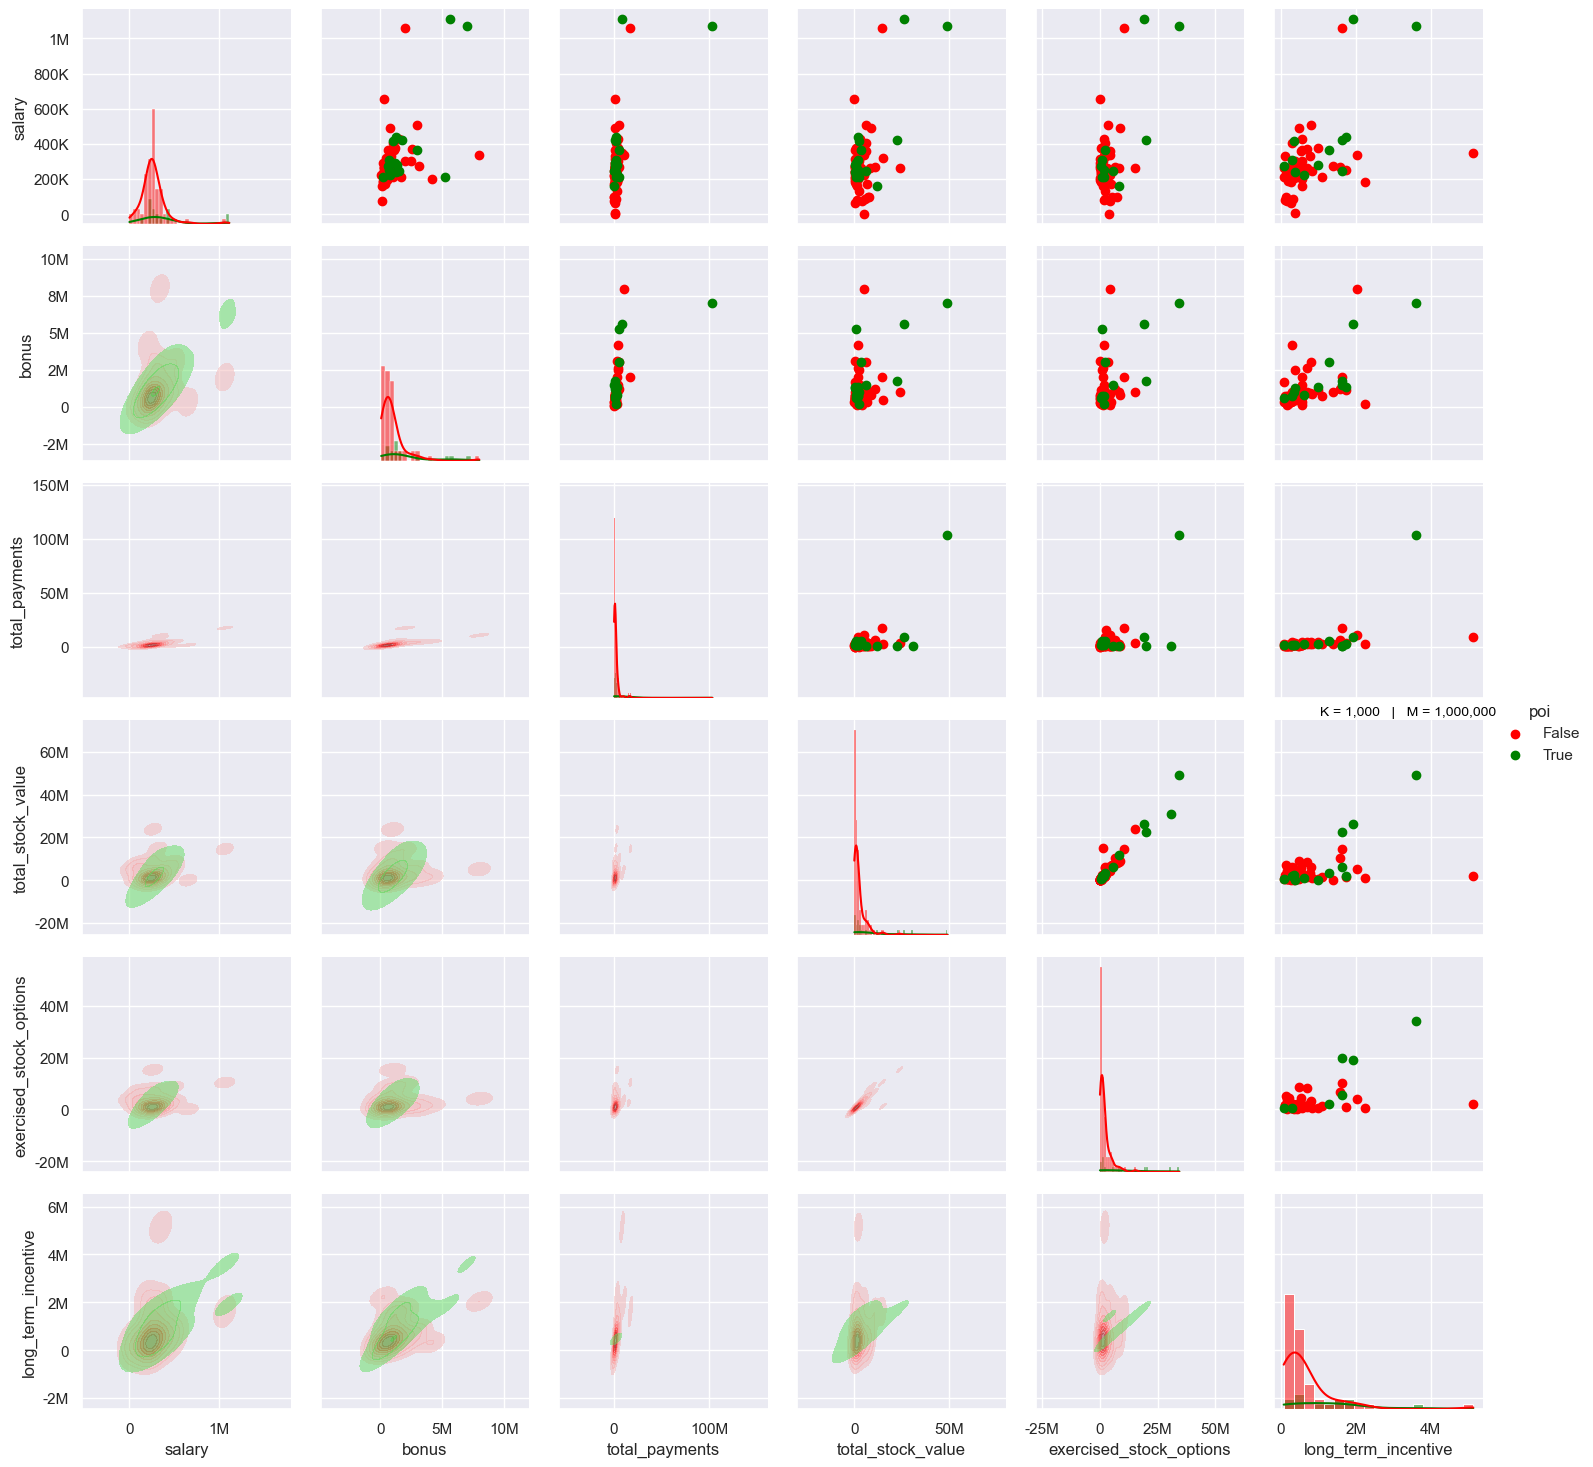

In [23]:
colunas = [
    'salary', 'bonus', 'total_payments', 'total_stock_value',
    'exercised_stock_options', 'long_term_incentive'
]

grid = sns.PairGrid(df, vars=colunas, hue='poi', palette=cores_poi)
grid.map_lower(sns.kdeplot, fill=True, alpha=0.5)
grid.map_diag(sns.histplot, kde=True)
grid.map_upper(plt.scatter)
grid.add_legend()

for ax in grid.axes.flat:
    if ax is not None:
        ax.xaxis.set_major_formatter(formatter)
        ax.yaxis.set_major_formatter(formatter)

adicionar_legenda_escala(x=0.94, y=0.51)
plt.show()


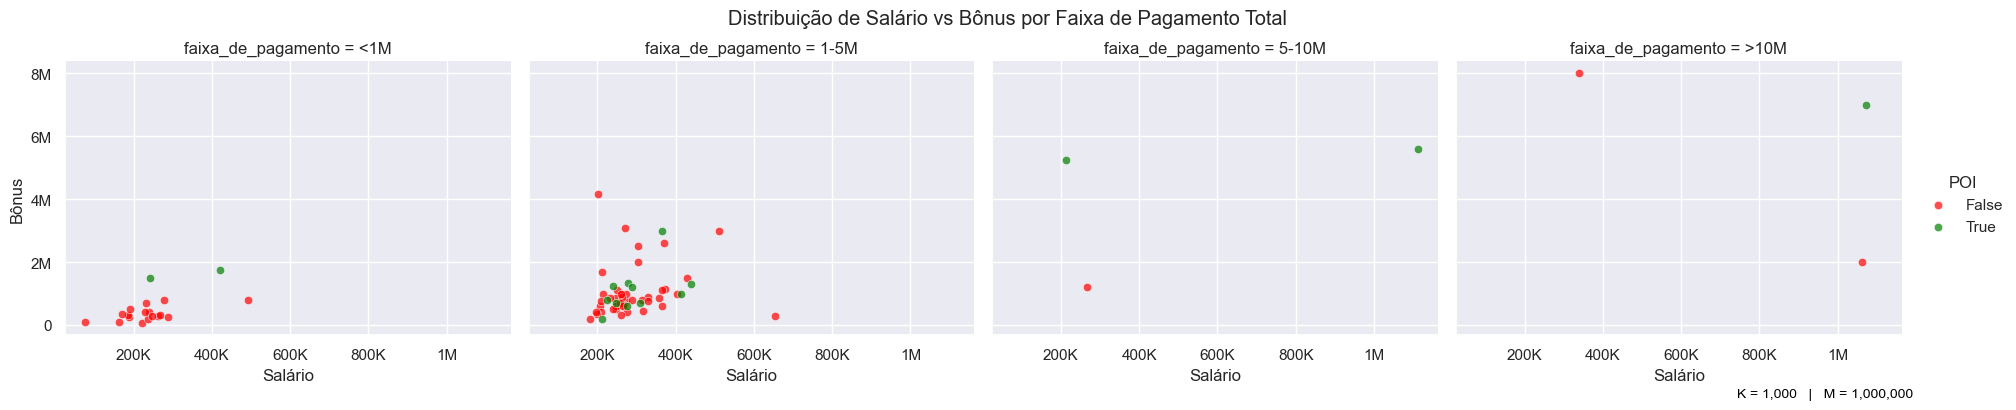

In [ ]:
g = sns.FacetGrid(df, col='faixa_de_pagamento', hue='poi', palette={True: 'green', False: 'red'}, height=4, aspect=1.2)
g.map(sns.scatterplot, 'salary', 'bonus', alpha=0.7)
g.add_legend(title='POI')
g.set_axis_labels('Salário', 'Bônus')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Distribuição de Salário vs Bônus por Faixa de Pagamento Total')

for ax in g.axes.flat:
    if ax is not None:
        ax.xaxis.set_major_formatter(formatter)
        ax.yaxis.set_major_formatter(formatter)

adicionar_legenda_escala()
plt.show()

## 1. POIs recebem bônus desproporcionais em relação ao salário?

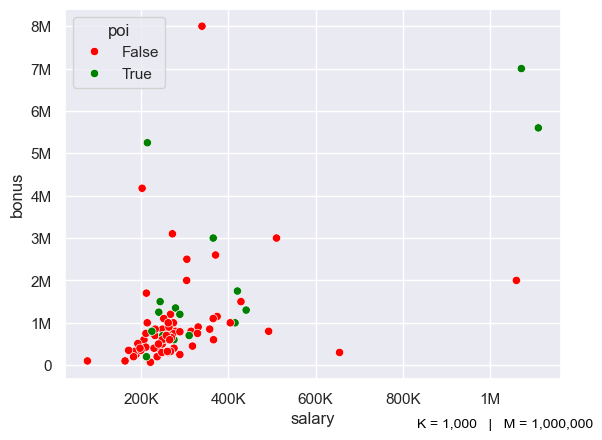

In [ ]:
sns.scatterplot(df, x='salary', y='bonus', hue='poi', palette=cores_poi)

ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
adicionar_legenda_escala()

plt.show()

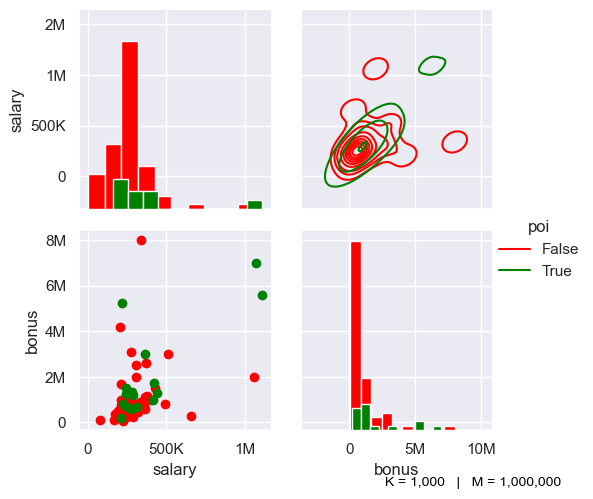

In [ ]:
p1 = sns.PairGrid(df, vars=['salary', 'bonus'], hue='poi', palette=cores_poi)
p1.map_lower(plt.scatter)
p1.map_diag(plt.hist)
p1.map_upper(sns.kdeplot).add_legend()

for ax in p1.axes.flat:
    if ax is not None:
        ax.xaxis.set_major_formatter(formatter)
        ax.yaxis.set_major_formatter(formatter)

adicionar_legenda_escala()

plt.show()

### Uma seleta minoria sim, mas não pode ser conclusivo, pois vemos que 2 POIs receberam um grande bônus apesar de seu grande salário, enquanto que temos o caso de 1 não-POI que recebeu o maior bônus da companhia, mas possuia um salário próximo da média.

## 2. Qual a relação entre total_payments e total_stock_value para POIs e não-POIs?

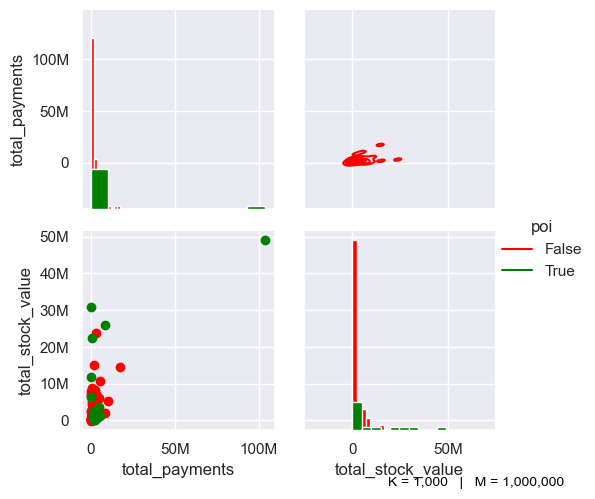

In [ ]:
p2 = sns.PairGrid(df, vars=['total_payments', 'total_stock_value'], hue='poi', palette=cores_poi)
p2.map_lower(plt.scatter)
p2.map_diag(plt.hist)
p2.map_upper(sns.kdeplot).add_legend()

for ax in p2.axes.flat:
    if ax is not None:
        ax.xaxis.set_major_formatter(formatter)
        ax.yaxis.set_major_formatter(formatter)
adicionar_legenda_escala()

plt.show()

### Além do único outlier discrepante, pode-se perceber que todos os outros possuem uma relação muito próxima um do outro.

## 3. POIs tendem a exercer mais opções de ações (exercised_stock_options)?

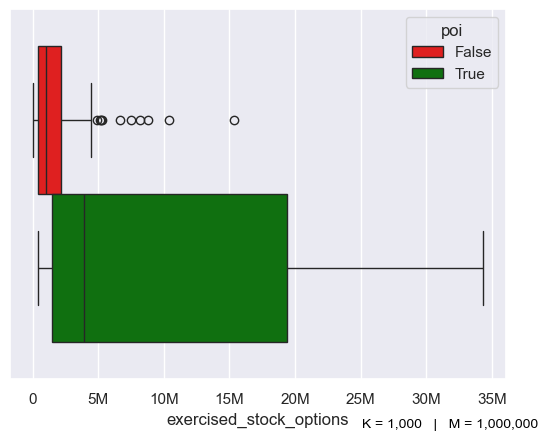

In [ ]:
p3 = sns.boxplot(df, x='exercised_stock_options', hue='poi', palette=cores_poi)

ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
adicionar_legenda_escala()
plt.show()

### Certamente, segundo o grafo de bloxplot, podemos observar que além da variância quase 4x maior para os POIs, também vemos que os valores dos quartis e do valor máximo são muito superiores aos não-POIs.

## 4. Existe correlação entre long_term_incentive e bonus?

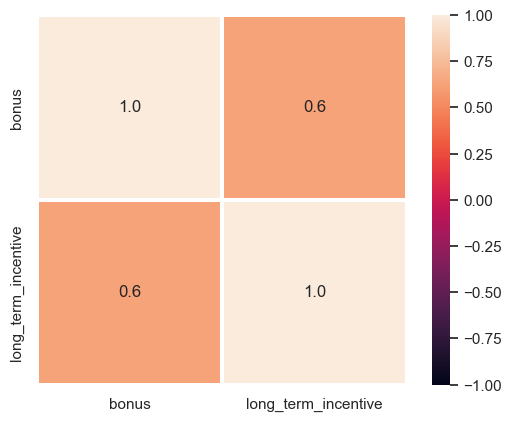

In [ ]:
variaveis = ['bonus', 'long_term_incentive']
correlacao = df[variaveis].corr()

sns.heatmap(correlacao, annot=True, vmin=-1, vmax=1, linewidth=1.5, square=True, fmt='.1f')
plt.show()

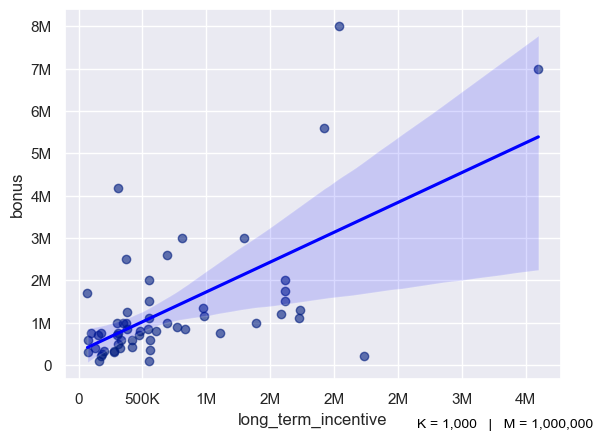

In [ ]:
sns.regplot(data=df, x='long_term_incentive', y='bonus', scatter_kws={'alpha':0.6}, line_kws={'color': 'blue'}, ci=95)

ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
adicionar_legenda_escala()

plt.show()

### Podemos perceber que temos uma tendência positiva entre as variáveis.

## 5. Quais variáveis financeiras mais se correlacionam com ser POI?

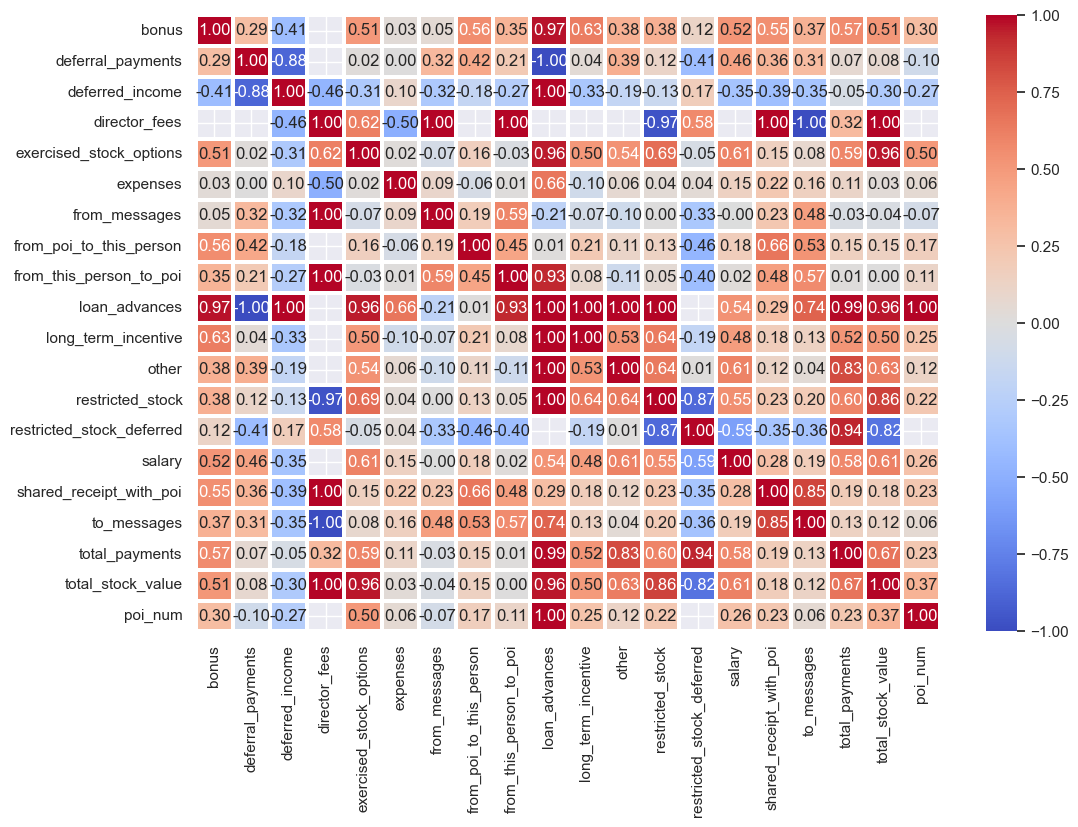

In [ ]:
df['poi_num'] = df['poi'].astype(int)

df_numericas = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_numericas.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1.5)
plt.show()

In [ ]:
loan = df['loan_advances'].notna().sum()
exercised = df['exercised_stock_options'].notna().sum()
bon = df['bonus'].notna().sum()

print(f'loan_advances: {loan} ({(loan/len(df)) * 100:.1f}%)')
print(f'exercised_stock_options: {exercised} ({(exercised/len(df)) * 100:.1f}%)')
print(f'bonus: {bon}  ({(bon/len(df)) * 100:.1f}%)')

loan_advances: 3 (2.1%)
exercised_stock_options: 101 (69.7%)
bonus: 81  (55.9%)


### Analisando as correlações, nota-se a alta correlação com loan_advances, mas em uma pesquisa mais detalhada, descobre-se que essa variável só possui 3 campos não nulos, tornando-a descartável nesse dataset. Em contra partida, temos exercised_stock_options com ~70% de dados não nulos e bonus com 56% de dados não-nulos. Sendo correlações moderadas.

### A variável loan_advances será ignorada dos resultados, a partir daqui.

## 6. POIs têm mais restricted_stock ou restricted_stock_deferred?

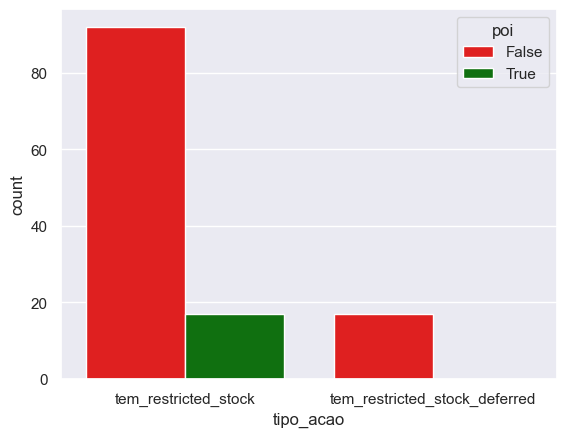

In [ ]:
df['tem_restricted_stock'] = df['restricted_stock'].notna().astype(int)
df['tem_restricted_stock_deferred'] = df['restricted_stock_deferred'].notna().astype(int)

df_melted = df.melt(
    id_vars='poi',
    value_vars=['tem_restricted_stock', 'tem_restricted_stock_deferred'],
    var_name='tipo_acao',
    value_name='presenca'
)

sns.countplot(data=df_melted[df_melted['presenca'] == 1], x='tipo_acao', hue='poi', palette=cores_poi)

plt.show()

### É possível ver que os não-POis possuem mais ações restritas (restricted_stock), demonstrando que os POIs não possuíam nenhuma restrição quanto as ações (stocks) da empresa. Quanto que as deferred mostra um valor pequeno de apenas não-POIs, o que pode dar a entender que os outros valores são 0 e que apenas não-POIs tiveram esse adiamento das ações que foram concedidas.

## 7. Qual a distribuição de expenses entre POIs e não-POIs?


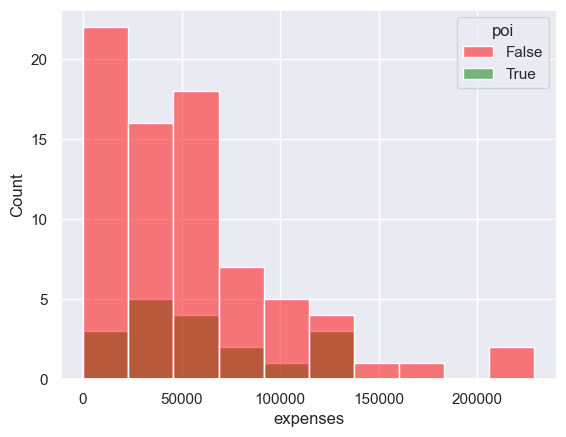

In [ ]:
sns.histplot(df, x='expenses', hue='poi', palette=cores_poi)
plt.show()

### Constata-se que os POIs possuiam bem menos despesas do que os não-POIs, tendo em vista a frequencia até 3x maior nos valores mais baixos, além de possuir despesas de mais de 200.000, enquanto que os POIs estão concentrados nos valores até 125.000 e com uma frequência demasiadamente baixa.

## 8. POIs tendem a exercer mais opções de ações (exercised_stock_options) do que não-POIs?

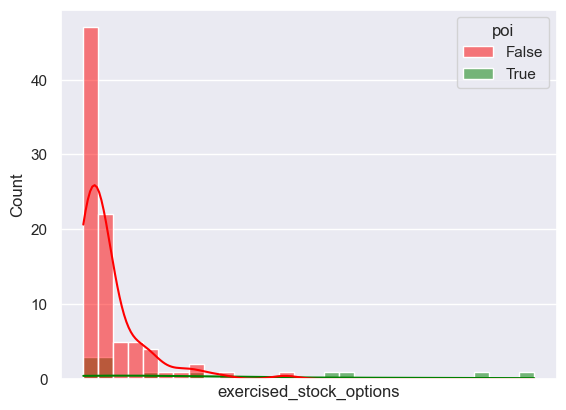

In [ ]:
sns.histplot(df, x='exercised_stock_options', hue='poi', palette=cores_poi, kde=True, bins=30)
plt.xticks([])
plt.show()

### Entende-se que os POIs tinham acesso a pacotes maiores de ações, exerciam a opção de ação com bem mais frequência, mas em pacotes menores. Pode-se presumir que os POIs só exerciam esse direito com antecipações, demonstrando um comportamento suspeito quando comparados aos não-POIs. Portanto, os POIs tendem mesmo a exercer mais opções de ações do que Não-POIs, tanto em valor como em dispersão.

## 9. Existe relação entre deferral_payments e deferred_income?

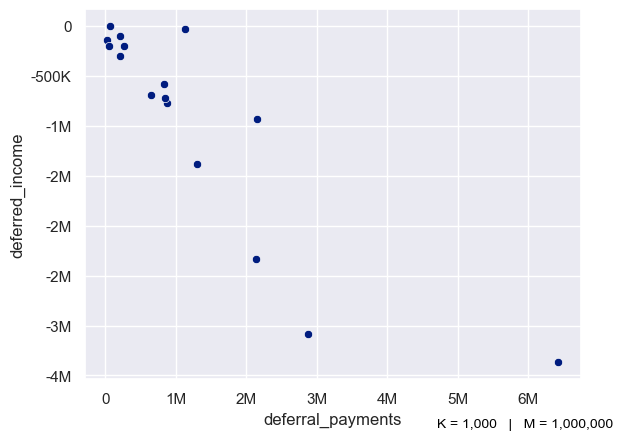

In [ ]:
sns.scatterplot(df, x='deferral_payments', y='deferred_income')

ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
adicionar_legenda_escala()

plt.show()

### Existe uma tendência negativa na relação entre deferral_payments e deferred_income, podendo ser indicar manobras contábeis para adiar os pagamentos quanto registrar as receitas.

## 10. POIs aparecem mais entre os maiores valores de total_payments?

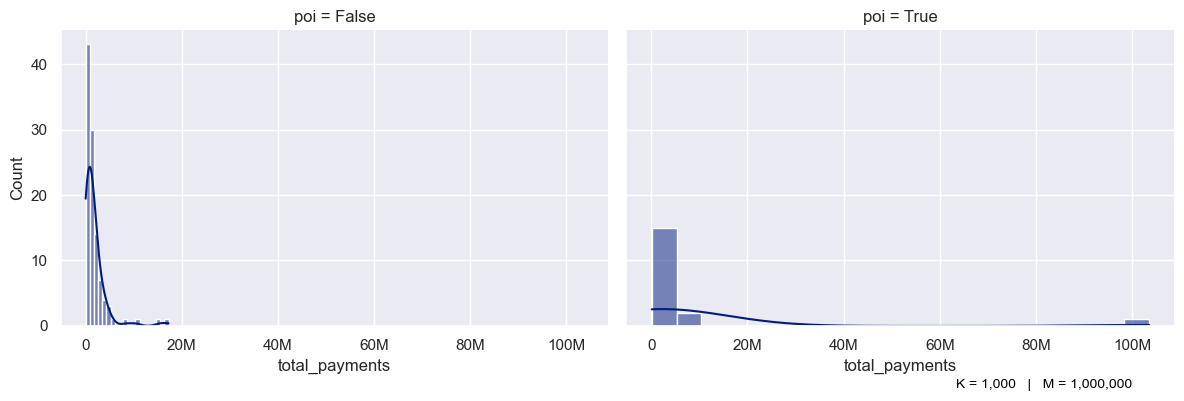

In [ ]:
grid = sns.FacetGrid(df, col='poi', palette=cores_poi, height=4, aspect=1.5)
grid.map(sns.histplot, 'total_payments', bins=20, kde=True)


#g.set(ylim=(-0.2, 20))
for ax in grid.axes.flat:
    if ax is not None:
        ax.xaxis.set_major_formatter(formatter)
        ax.yaxis.set_major_formatter(formatter)
adicionar_legenda_escala()

plt.show()

### Contasta-se que os POIs possuem uma distribuição mais ampla e elevada, com valores chegando a 100 milhões, enquanto que os não-POI concentram-se, de forma assimétrica, em valores abaixo de 20 milhões. Demonstrando que os POIs estavam e posições mais poderosas ou possuíam envolvimento em movimentações financeiras significativas.

## 11. POIs enviam mais e-mails para outros POIs?


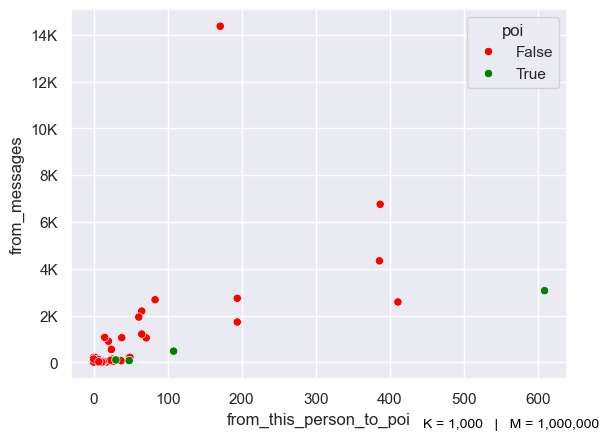

In [ ]:
sns.scatterplot(df, x='from_this_person_to_poi',y='from_messages', hue='poi', palette=cores_poi)

ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
adicionar_legenda_escala()
plt.show()

C:\Users\wilde\AppData\Local\Temp\ipykernel_35780\3044884339.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='poi', y='proporcao_para_poi', palette=cores_poi)


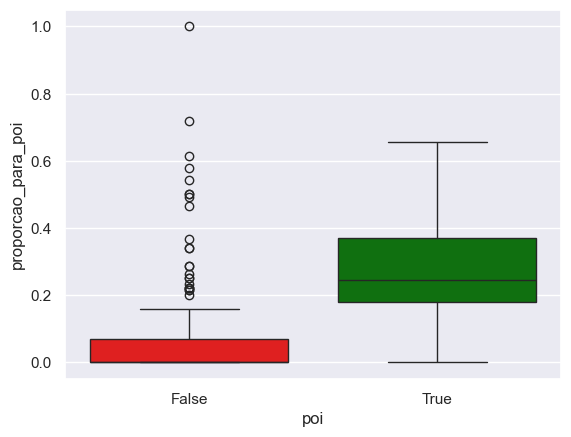

In [ ]:
# Criando uma coluna com proporção entra as colunas from_this_person_to_poi e from_messages
df['proporcao_para_poi'] = df['from_this_person_to_poi'] / df['from_messages']

# Imputando valores 0 nos NA para uma melhor visualização.
df['proporcao_para_poi'] = df['proporcao_para_poi'].fillna(0)

sns.boxplot(df, x='poi', y='proporcao_para_poi', palette=cores_poi)
plt.show()

### Contasta-se que POIs enviam uma proporção muito maior de suas mensagens para outros POIs, o que indica comunicação frequente entre POIs. Enquanto que os não-POI, apesar de enviarem mais mensagens, no quesito de enviar para POI, sua variância é quase 0, com exceção de alguns outliers.

## 12. POIs recebem mais e-mails de outros POIs?

C:\Users\wilde\AppData\Local\Temp\ipykernel_35780\995195376.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='poi', y='from_poi_to_this_person', palette=cores_poi)


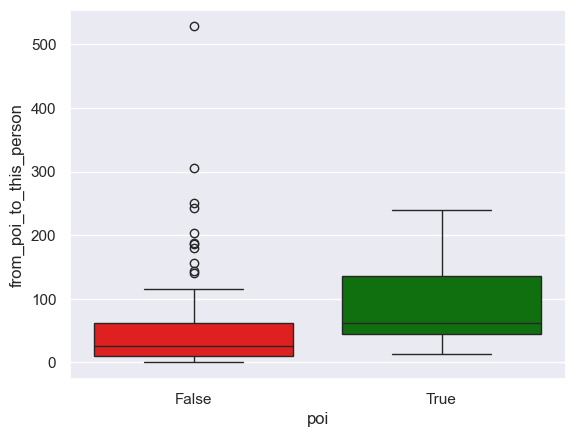

In [ ]:
sns.boxplot(df, x='poi', y='from_poi_to_this_person', palette=cores_poi)
plt.show()

### Confirmando o que foi visto na questão anterior, a proporção de mensagens originárias de POIs é mais frequente para os próprios POIs.

## 13. Existe relação entre shared_receipt_with_poi e ser POI?

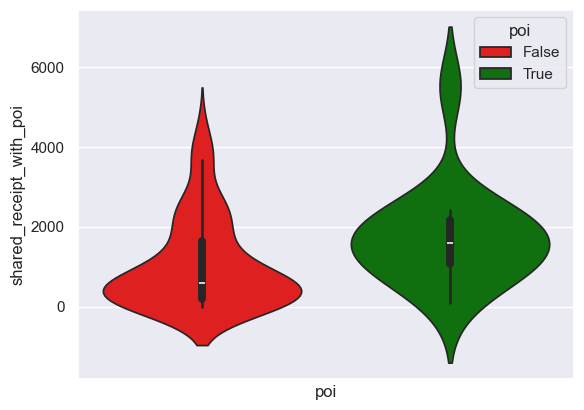

In [ ]:
sns.violinplot(df, x='poi', y='shared_receipt_with_poi', hue='poi', palette=cores_poi, inner='box')
plt.xticks([])
plt.show()

In [ ]:
df.groupby('poi')['shared_receipt_with_poi'].describe()

,count,mean,std,min,25%,50%,75%,max
poi,,,,,,,,
False,72.0,1058.527778,1132.503757,2.0,191.50,594.0,1635.50,4527.0
True,14.0,1783.000000,1264.996625,91.0,1059.25,1589.0,2165.25,5521.0


In [ ]:
df[['name', 'poi', 'shared_receipt_with_poi']].sort_values(by='shared_receipt_with_poi', ascending=False).head()

,name,poi,shared_receipt_with_poi
7,BELDEN TIMOTHY N,True,5521.0
117,SHAPIRO RICHARD S,False,4527.0
78,LAVORATO JOHN J,False,3962.0
139,WHALLEY LAWRENCE G,False,3920.0
75,KITCHEN LOUISE,False,3669.0


### Entende-se que os POIs tem valores muito mais altos, sugerindo um maior envolvimento entre POIs, mas também há não-POIs com altos valores, podendo significar que alguns não-POI colaboravam com os POIs, sugerindo uma investigação complementar.

## 14. POIs enviam mais e-mails em geral (from_messages)?

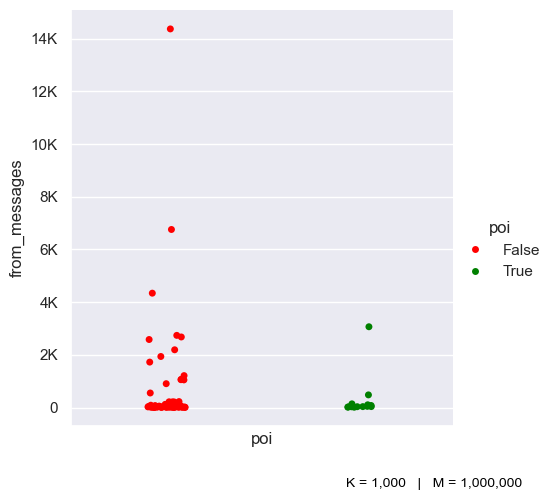

In [ ]:
sns.catplot(df, x='poi', y='from_messages', hue='poi', palette=cores_poi)
plt.xticks([])
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
adicionar_legenda_escala()
plt.show()

### Pode-se notar a quantidade demasiadamente inferior de mensagens de POIs, quando comparado aos não-POIs. Isso demonstra que os POIs deveriam se comunicar por meios não oficiais ou alternativos, evitando a rastreabilidade.

## 15. POIs aparecem mais entre os que mais recebem e-mails (to_messages)?

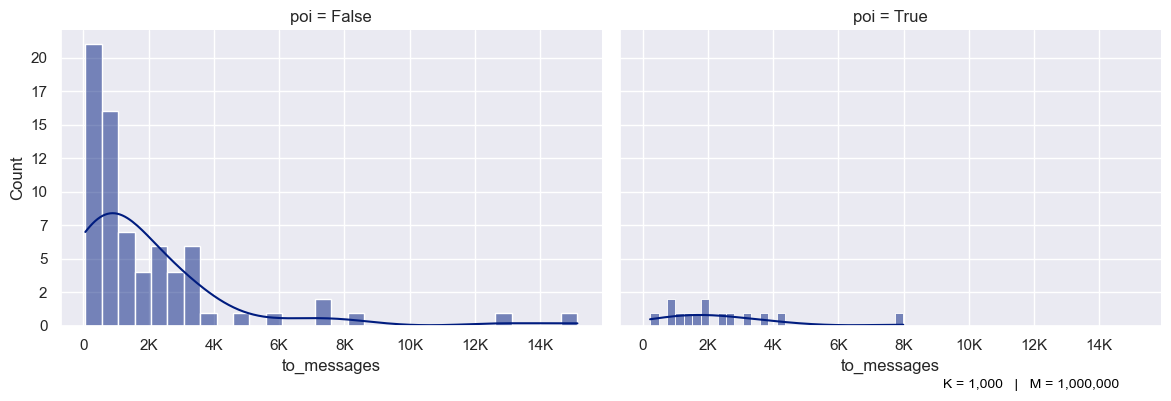

In [ ]:
grid = sns.FacetGrid(df, col='poi', palette=cores_poi, height=4, aspect=1.5)
grid.map(sns.histplot, 'to_messages', bins=30, kde=True)

for ax in grid.axes.flat:
    if ax is not None:
        ax.xaxis.set_major_formatter(formatter)
        ax.yaxis.set_major_formatter(formatter)
adicionar_legenda_escala()

plt.show()

### Entende-se que POIs recebiam muito menos e-mails do que não-POIs, reforçando o demonstrado na questão anterior de que POIs utilizam meios não oficiais de se comunicar.

## 16. Qual o perfil de POIs em termos de salary, bonus, e stock_value?

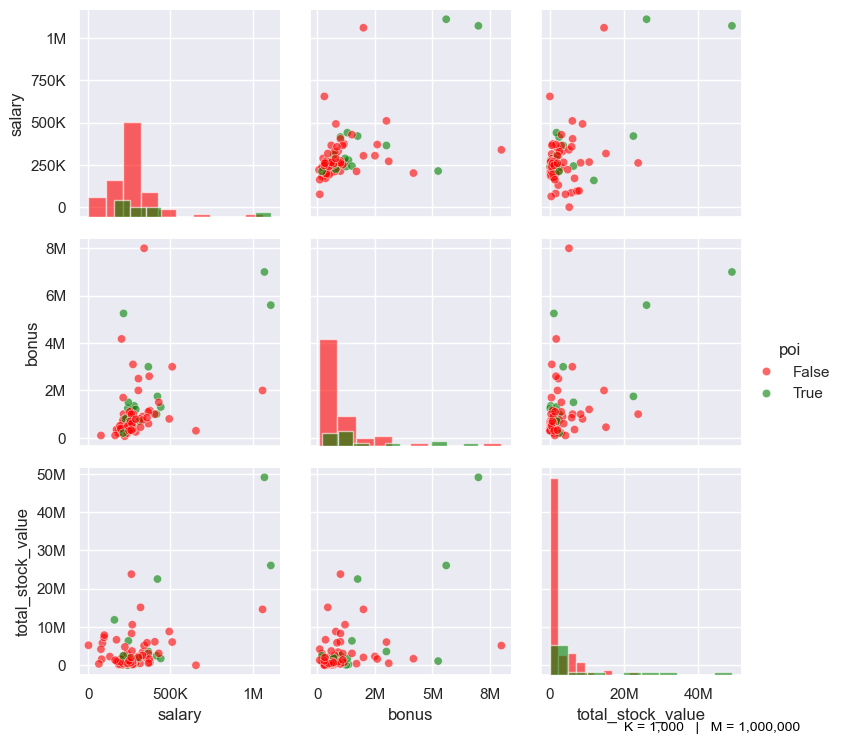

In [ ]:
grid = sns.PairGrid(df, vars=[ 'salary', 'bonus', 'total_stock_value'], hue='poi', palette=cores_poi)
grid.map_offdiag(sns.scatterplot, alpha=0.6).add_legend()
grid.map_diag(plt.hist, alpha=0.6)

for ax in grid.axes.flat:
    if ax is not None:
        ax.xaxis.set_major_formatter(formatter)
        ax.yaxis.set_major_formatter(formatter)
adicionar_legenda_escala()
plt.show()

### Pela visualiação acima, entende-se que os POI, em média, possuem salário, bônus e opções de ações superior aos não-POIs, com exceção de uns outliers, além de que o maior valor dentre os 3 campos é de um POI, reforçando uma vantagem financeira significativa.

## 17. Existe um padrão entre POIs com altos valores de bonus e muitos e-mails com POIs?

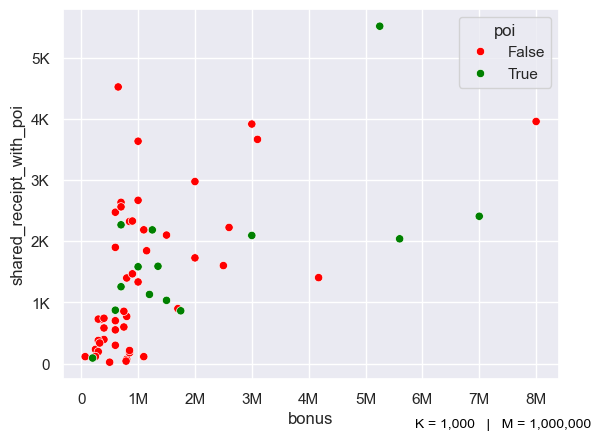

In [ ]:
sns.scatterplot(df, x='bonus', y='shared_receipt_with_poi', hue='poi', palette=cores_poi)
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
adicionar_legenda_escala()
plt.show()

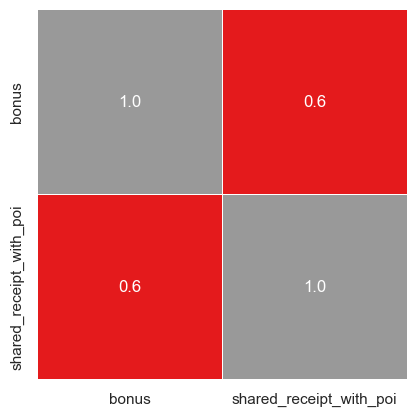

In [ ]:
df_poi = df[df['poi']]

corr = df_poi[['bonus', 'shared_receipt_with_poi']].corr()

sns.heatmap(corr, annot=True, square=True, cbar=False, linewidth=0.5, fmt='.1f', cmap='Set1')
plt.show()

### Entende-se que apesar da distribuição espassa de POIs, há uma correlação moderada à forte positiva entre os POIs, sugerindo que POIs com bônus maiores aparecem mais em e-mails compartilhados com outros POIs. Refletindo o nível de envolvimento no problema.

## 18. POIs com altos expenses também têm altos total_payments?

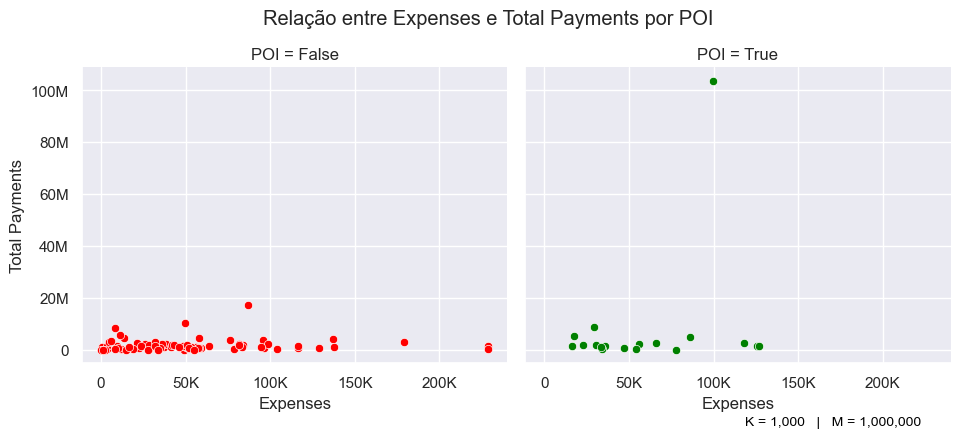

In [ ]:
grid = sns.FacetGrid(df, col='poi',hue='poi', palette=cores_poi, height=4, aspect=1.2)
grid.map_dataframe(sns.scatterplot, x='expenses', y='total_payments')

grid.set_titles(col_template="POI = {col_name}")
grid.set_axis_labels("Expenses", "Total Payments")
grid.fig.suptitle("Relação entre Expenses e Total Payments por POI", y=1.05)
for ax in grid.axes.flat:
    if ax is not None:
        ax.xaxis.set_major_formatter(formatter)
        ax.yaxis.set_major_formatter(formatter)
adicionar_legenda_escala()

plt.show()

### Confirma-se o que foi visto anteriormente, os POIs possuem menos despesas que os não POIs, vendo pela distribuição escassa dos POIs nos valores baixos, contra a densa distribuição dos não-POI que variam até quase 250.000, enquanto que a maior despesa dos POIs chega perto de 130.000.

## 19. POIs com restricted_stock_deferred tendem a ter deferred_income?

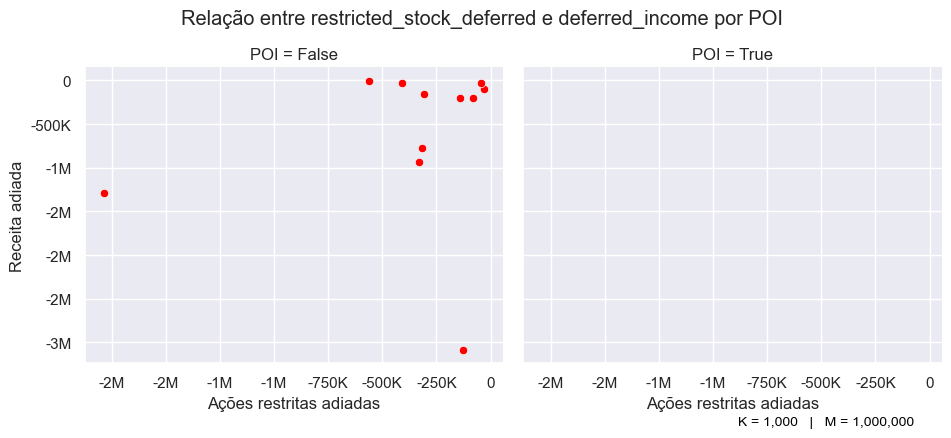

In [ ]:
grid = sns.FacetGrid(df, col='poi',hue='poi', palette=cores_poi, height=4, aspect=1.2)
grid.map_dataframe(sns.scatterplot, x='restricted_stock_deferred', y='deferred_income')

grid.set_titles(col_template="POI = {col_name}")
grid.set_axis_labels("Ações restritas adiadas", "Receita adiada")
grid.fig.suptitle("Relação entre restricted_stock_deferred e deferred_income por POI", y=1.05)
for ax in grid.axes.flat:
    if ax is not None:
        ax.xaxis.set_major_formatter(formatter)
        ax.yaxis.set_major_formatter(formatter)
adicionar_legenda_escala()

plt.show()

### Conforme foi visto anteriormente, somente os não-POIs tiveram Ações com restrição adiadas, mostrando o controle que os POIs tinham sobre o financeiro.

## 20. Qual a distribuição de salary e bonus por faixa de total_payments?

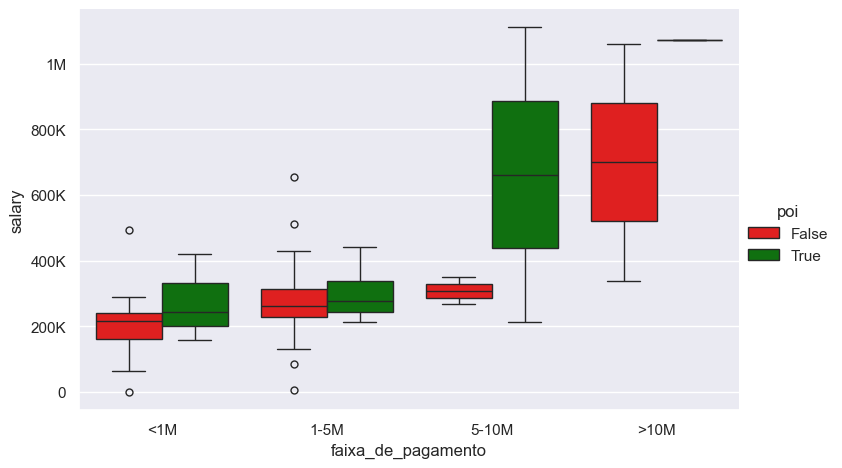

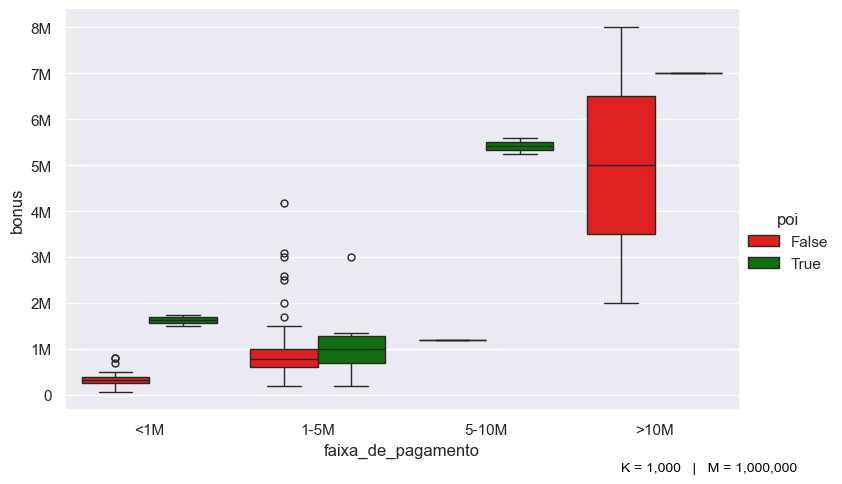

In [ ]:
a = sns.catplot(df, x='faixa_de_pagamento', y='salary', kind='box',hue='poi', palette=cores_poi, height=5, aspect=1.5)
b = sns.catplot(df, x='faixa_de_pagamento', y='bonus', kind='box',hue='poi', palette=cores_poi, height=5, aspect=1.5)

for ax in a.axes.flat:
    if ax is not None:
        ax.yaxis.set_major_formatter(formatter)

for ax in b.axes.flat:
    if ax is not None:
        ax.yaxis.set_major_formatter(formatter)
adicionar_legenda_escala()

plt.show()

### Segundo as visualizações acima, posso entender que os POIs estavam presentes em todos os níveis hierarquicos, não se restrigindo aos níveis superiores.

###

# Visualizações efetivas

Nesta seção, você deve **escolher** e **melhorar** 5 visualizações criadas anteriormente.
A chave aqui é melhorar estas visualizações com o objetivo de apresentá-las a uma audiência que não conheça a base de dados da Enron e/ou não trabalhe com análise de dados.
**Sendo assim, garanta que o tamanho, cores, texturas e outras componentes visuais sejam bem escolhidas e utilizadas, sempre visando garantir que a informação seja passada de forma clara e correta para a audiência.**

Para cada um destas visualizações, garanta que as seguintes etapas foram seguidas:

1. Criação de visualização: Criar novamente a visualização, garantindo que ela possui título e rótulos nos eixos e legenda (caso necessário)
2. Cores: Garantir que o uso de cores é correto, de acordo com o objetivo da visualização e também com escalas de cores visando leitores daltônicos
3. Cores e tamanhos: Garantir que texturas e tamanhos são utilizados de forma correta
4. Chart junk: Garantir que a visualização possui um baixo fator de "chart junk"
5. Avaliação por pares: você deverá angariar feedback de três pessoas sobre sua visualização. Você deverá apresentar o feedback de cada pessoa, assim como deve discutir, de forma textual, se este feedback acarretou em alguma mudança de design. Você deve apresentar evidências das mudanças realizadas, isto é, a visualização **antes** e **depois** do *feedback*.
6. Descrição: cada visualização deve ser acompanhada de uma descrição que inclua as principais descobertas (*insights*) que podem ser extraídos a partir dela.




In [ ]:
# crie as visualizações finais aqui
# novamente, use quantas células forem necessárias

# Conclusão


## Reflexão

Nesta seção você deve apresentar uma reflexão sobre sua atuação neste projeto e sobre os conceitos aprendidos e praticados. A idéia é apresentar (1) o que você fez bem e (2) o que você poderia ter feito diferente. Esta reflexão deve possuir ao menos 2500 caracteres (sem espaços).


```
Escreva sua resposta aqui.
```

# Referências

Adicione na célula abaixo todas as referências utilizadas durante a preparação deste relatório.

```
Adicione as referências aqui.
```

## Trabalhos futuros

Na célula abaixo, apresente ao menos 3 (três) idéias diferentes que você gostaria de atuar em um trabalho futuro com esta mesma base de dados. Elas podem incluir, por exemplo, o uso de aprendizagem de máquina para um objetivo específico, ou criar/analisar variáveis que não tivemos tempo de fazer durante a execução deste trabalho. 
Você deve fornecer **detalhes** sobre como cada idéia seria abordada, especificando as técnicas e/ou metodologia a ser seguida.
Esta seção deve possuir ao menos 2500 caracteres (sem espaços).

```
Escreva sua resposta aqui.
```


# Último passsos

1. Salve este relatório como um jupyter notebook em formato `.ipynb`
2. Salve uma cópia deste relatório como um arquivo PDF, isto é, com extensão `.pdf`
3. Compacte ambos em um único arquivo com extensão ZIP no seguinte formato:(`analise-enron-primeiro_nome-ultimo_nome.zip`)
4. Envie o seu relatório para avaliação no ambiente virtual de aprendizagem

In [27]:
df.name.describe()

count                 145
unique                145
top       ALLEN PHILLIP K
freq                    1
Name: name, dtype: object